# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Открываем файл и сохраняем его в переменной data
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# Выводим на экран первые 10 строк таблицы, увеличив максимальное количество отображающихся столбцов
pd.set_option('display.max_columns', None)
data.head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0        51.00      8          NaN   False   
1             NaN          11.0        18.60      1          NaN   False   
2             NaN           5.0        34.30      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0        32.00     13          NaN   False   
5             NaN          12.0        14.40      5          NaN   False   
6             NaN          26.0        10.60      6          NaN   False   
7             NaN          24.0          NaN     22          NaN   False   
8             NaN          27.0        15.43     26          NaN   False   
9            2.50           9.0        43.60      7          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False         25.00      NaN            Санкт-Петербург   
1      False         11.00      2.0             посёлок Шушары   
2      False          8.30      0.0            Санкт-Петербург   
3      False           NaN      0.0            Санкт-Петербург   
4      False         41.00      NaN            Санкт-Петербург   
5      False          9.10      NaN  городской посёлок Янино-1   
6      False         14.40      1.0          посёлок Парголово   
7      False         18.90      2.0            Санкт-Петербург   
8      False          8.81      NaN             посёлок Мурино   
9      False          6.50      2.0            Санкт-Петербург   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0               1.0          482.0   
1           12817.0              18603.0               0.0            NaN   
2           21741.0              13933.0               1.0           90.0   
3           28098.0               6800.0               2.0           84.0   
4           31856.0               8098.0               2.0          112.0   
5               NaN                  NaN               NaN            NaN   
6           52996.0              19143.0               0.0            NaN   
7           23982.0              11634.0               0.0            NaN   
8               NaN                  NaN               NaN            NaN   
9           50898.0              15008.0               0.0            NaN   

   ponds_around3000  ponds_nearest  days_exposition  
0               2.0          755.0              NaN  
1               0.0            NaN             81.0  
2               2.0          574.0            558.0  
3               3.0          234.0            424.0  
4               1.0           48.0            121.0  
5               NaN            NaN             55.0  
6               0.0            NaN            155.0  
7               0.0            NaN              NaN  
8               NaN            NaN            189.0  
9               0.0            NaN            289.0

In [4]:
# Выводим на экран последние 10 строк таблицы
data.tail(10)

total_images  last_price  total_area first_day_exposition  rooms  \
23689            13   3550000.0       35.30  2018-02-28T00:00:00      1   
23690             3   5500000.0       52.00  2018-07-19T00:00:00      2   
23691            11   9470000.0       72.90  2016-10-13T00:00:00      2   
23692             2   1350000.0       30.00  2017-07-07T00:00:00      1   
23693             9   4600000.0       62.40  2016-08-05T00:00:00      3   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
23689            2.86          15.0         16.3      4          NaN   False   
23690             NaN           5.0         31.0      2          NaN   False   
23691            2.75          25.0         40.3      7          NaN   False   
23692             NaN           5.0         17.5      4          NaN   False   
23693            2.60           9.0         40.0      8          NaN   False   
23694            3.70           5.0         73.3      3          NaN   False   
23695             NaN           5.0         38.0      4          NaN   False   
23696             NaN           3.0         29.7      1          NaN   False   
23697            3.00          17.0          NaN     12          NaN   False   
23698            2.50           5.0         12.3      1          NaN   False   

       open_plan  kitchen_area  balcony        locality_name  \
23689      False          9.10      2.0      Санкт-Петербург   
23690      False          6.00      NaN      Санкт-Петербург   
23691      False         10.60      1.0      Санкт-Петербург   
23692      False          6.00      NaN               Тихвин   
23693      False          8.00      0.0             Петергоф   
23694      False         13.83      NaN      Санкт-Петербург   
23695      False          8.50      NaN                Тосно   
23696      False           NaN      NaN     село Рождествено   
23697      False         23.30      2.0      Санкт-Петербург   
23698      False          9.00      NaN  поселок Новый Учхоз   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
23689           17284.0              16081.0               1.0          353.0   
23690           20151.0               6263.0               1.0          300.0   
23691           19424.0               4489.0               0.0            NaN   
23692               NaN                  NaN               NaN            NaN   
23693           45602.0              34104.0               1.0          352.0   
23694           24665.0               4232.0               1.0          796.0   
23695               NaN                  NaN               NaN            NaN   
23696               NaN                  NaN               NaN            NaN   
23697           39140.0              10364.0               2.0          173.0   
23698               NaN                  NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
23689               2.0          652.0             29.0  
23690               0.0            NaN             15.0  
23691               1.0          806.0            519.0  
23692               NaN            NaN            413.0  
23693               1.0          675.0            239.0  
23694               3.0          381.0              NaN  
23695               NaN            NaN             45.0  
23696               NaN            NaN              NaN  
23697               3.0          196.0            602.0  
23698               NaN            NaN              NaN

In [5]:
# Посмотрим общую информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

***На основе полученных данных можно отметить, что:***

**last_price** - должен быть тип данных int64

**first_day_exposition** - должен быть тип данных datetime

**floors_total** - должен быть тип данных int64

**is_apartment**  - должен быть тип данных bool
   
**balcony** - должен быть тип данных int64

**parks_around3000** должен быть тип данных int64

**ponds_around3000** должен быть тип данных int64

**days_exposition** должен быть тип данных int64

In [6]:
# Проверим таблицу на количество дубликатов
data.duplicated().sum()

0

In [7]:
# Проверим таблицу на количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# Посмотрим характерные значения по таблице 
data.describe().astype('int')

total_images  last_price  total_area  rooms  ceiling_height  \
count         23699       23699       23699  23699           14504   
mean              9     6541548          60      2               2   
std               5    10887013          35      1               1   
min               0       12190          12      0               1   
25%               6     3400000          40      1               2   
50%               9     4650000          52      2               2   
75%              14     6800000          69      3               2   
max              50   763000000         900     19             100   

       floors_total  living_area  floor  kitchen_area  balcony  \
count         23613        21796  23699         21421    12180   
mean             10           34      5            10        1   
std               6           22      4             5        1   
min               1            2      1             1        0   
25%               5           18      2             7        0   
50%               9           30      4             9        1   
75%              16           42      8            12        2   
max              60          409     33           112        5   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count             18157                18180             18181           8079   
mean              28793                14191                 0            490   
std               12630                 8608                 0            342   
min                   0                  181                 0              1   
25%               18585                 9238                 0            288   
50%               26726                13098                 0            455   
75%               37273                16293                 1            612   
max               84869                65968                 3           3190   

       ponds_around3000  ponds_nearest  days_exposition  
count             18181           9110            20518  
mean                  0            517              180  
std                   0            277              219  
min                   0             13                1  
25%                   0            294               45  
50%                   1            502               95  
75%                   1            729              232  
max                   3           1344             1580

***На основе полученных данных можно отметить, что:***

**В last_price** минимальная стоимость квартиры составляет 12190 р., а максимальная - 763000000 р., что говорит о том, что во-первых разброс цен большой, что-то из таких данных в итоге может оказаться выбросом, во-вторых стоит проверить такие минимальные цены на квартиры, это может просто оказаться ошибкой при заполнении объявления.

**В rooms** минимальное значение - 0 комнат, что является подозрительным. Возможно, была допущена какая-то ошибка. Максимальное количество комнат - 19, что тоже, скорее, является исключением из правил.

**В ceiling_height** мы видим минимальную высоту потолков в 1 м, а максимальную - в 100 м. Это явная ошибка.

**В living_area** минимальная жилая площадь - 2 кв. метра, такого быть не может. Это явная ошибка.

**В days_exposition** минимальное количество дней - 1, максимальное - 1580. Разброс большой, возможно что-то из этих данных в дальнейшем нужно будет исключить, как вбросы.

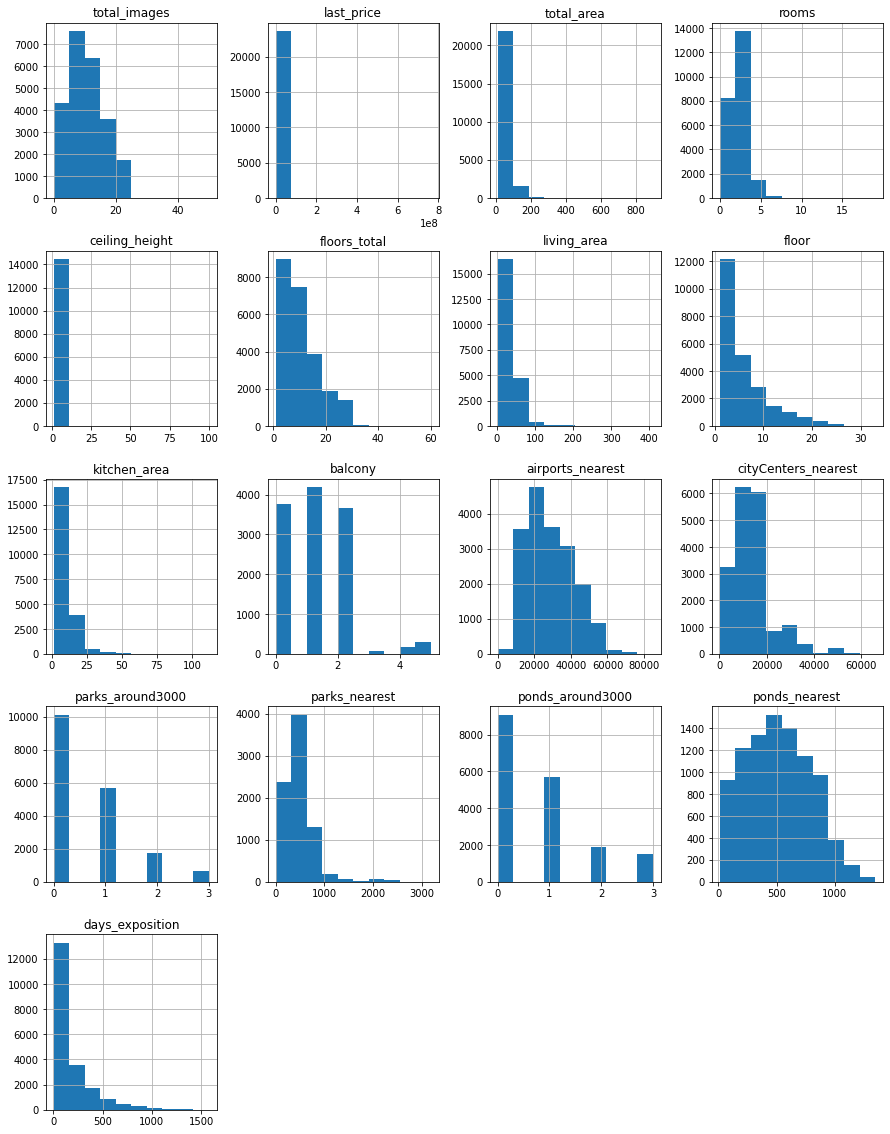

In [9]:
# Построим графики для наглядности
data.hist(figsize=(15, 20))
plt.show()

***Вывод:***

1.Названия нескольких столбцов выбиваются из общей массы, нужно будет привести их к единому стилю (змеиному_регистру). 

2.В данных таблицы содержится большое количество пропусков (NaN) - над этим нужно будет поработать.

3.В некоторых ячейках нужно будет поменять тип данных.

4.После изучения минимальных и максимальных значений в таблице стало понятно, что в данных содержатся ошибки, которые нужно будет проверить и обработать, а также для достоверности дальнейших выводов, нужно будет поработать и над выбросами. Выбросы также заметны на некоторых графиках.

### Предобработка данных

In [10]:
# Переименуем столбцы и приведем их к единому стилю
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [11]:
# Работаем с пропусками
# Для удобства проверим еще раз таблицу на количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

***На основе полученных данных можно отметить, что:***

**В ceiling_height** 9195 пропусков. Скорее всего, пропуски появились потому, что некоторые пользователи считают высоту потолков в своей квартире стандартными и от того не заполняют эту информацию, или они считают этот параметр неважным и не захотели измерять высоту потолков, или просто случайно забыли внести данные в графу. В дальнейшем можно будет заменить эти пропуски на медианное значение высоты потолков после того, как мы найдем и устраним выбивающиеся значения в этом столбце.

**В floors_total** всего 86 пропусков. Это не повлияет на исследование. Возможно, некоторые пользователи случайно забыли указать количество этажей в доме, а может кто-то из пользователей посчитал эту информацию не важной.

**В living_area** 1903 пропусков. Скорее всего, некоторые пользователи не указали метраж жилой зоны, потому что они считают, что данных об общей площади квартиры достаточно, или же они не хотят заморачиваться и измерять каждую комнату по отдельности. 

**В is_apartment** 20924 пропусков. Возможно, данные пропуски появились потому, что пользователи, в большинстве своем, чаще продают квартиры, а не апартаменты, потому графа is_apartment остается незаполненной ими. Тем не менее, это огромное количество пропусков. Однако, так как эти значения должны иметь булев тип данных, пропуски можно заменить на False.  

**В kitchen_area** 2278 пропусков. Скорее всего, некоторые пользователи не указали метраж кухонной зоны, потому что они считают, что данных об общей площади квартиры достаточно, или же они не захотели заморачиваться и измерять каждую комнату и кухню по отдельности. 

**В balcony** 11519 пропусков. Скорее всего, такое большое количество пропусков образовалось потому, что пользователи, у которых нет балкона в квартире, просто не стали указывать количество балконов в этой графе и пропустили ее. Такие данные можно заменить на 0.

**В locality_name** всего 49 пропусков. Возможно, некоторые пользователи случайно забыли указать название населенного пункта. 
Эти 49 пропусков не повлияют на исследование, их можно удалить.

**В airports_nearest** 5542 пропусков. Возможно, данные пропуски появились потому, что недвижимость некоторых пользователей находится далеко от аэропортов, из-за чего картографические данные отстутвуют. 

**В city_centers_nearest** 5519 пропусков. В этой графе и графах **parks_around_3000** и **ponds_around_3000** одинаковое количество пропусков. Скорее всего картографические данные для определенных объектов отсуствуют.

**В parks_around_3000** 5518 пропусков. Возможно, по близости с некоторыми объектами просто нет парков. Поэтому картографические данные для определенных объектов отсуствуют.

**В ponds_around_3000** 5518 пропусков. Возможно, по близости с некоторыми объектами просто нет прудов. Поэтому картографические данные для определенных объектов отсуствуют.

**В parks_nearest** 15620 пропусков. Скорее всего, картографические данные для половины объектов отсуствуют.

**В ponds_nearest** 14589 пропусков. Скорее всего, картографические данные для половины объектов отсуствуют.

**В days_exposition** 3181 пропусков. Отстуствует информация о том, сколько дней было размещено объявление (от публикации до снятия). Эту информацию не заполняют пользователи, она должна отображаться автоматически. Возможно, просто некоторые объявления еще являются актуальными. 

In [12]:
# Заменим пропуски is_apartment на False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [13]:
# Удалим пропущенные значения в locality_name и выполним проверку
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

In [14]:
# Заменим пропуски balcony на 0
data['balcony'] = data['balcony'].fillna(0)

In [15]:
# Еще раз посмотрим общую информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

***На основе полученных данных можно отметить, что:***

**last_price** - должен быть тип данных int64 (цена - это целое число)

**first_day_exposition** - должен быть тип данных datetime (нужно перевести данную графу в формат даты, убрав лишние значения о времени размещения объявлений, ведь там везде 00:00:00)

**floors_total** - должен быть тип данных int64 (количество этажей в доме - это целое число)
   
**balcony** - должен быть тип данных int64 (количество балконов - это целое число)

**parks_around_3000** должен быть тип данных int64 (число парков - это целое число)

**ponds_around_3000** должен быть тип данных int64 (число прудов - это целое число)

**days_exposition** должен быть тип данных int64 (количестово дней размещения - это целое число)

In [16]:
# Преобразуем данные в столбце first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
# Преобразуем данные в столбце last_price
data['last_price'] = data['last_price'].astype('int64')
# Преобразуем данные в столбце balcony
data['balcony'] = data['balcony'].astype('int64')
# Проверим изменения
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

***Преобразовать тип данных в floors_total, parks_around3000, ponds_around3000, days_exposition пока что не удается. Оставим тип float64***

In [17]:
# Проверим таблицу на количество дубликатов еще раз
data.duplicated().sum()

0

In [18]:
# Найдем уникальные значения в столбце locality_name
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

***На основе полученных данных можно отметить, что:***

Во-первых, можно заменить "посёлок" на "поселок".

Во-вторых, стало заметно, что названия некоторых населенных пунктов повторяются.

In [19]:
# Заменим "посёлок" на "поселок" и выполним проверку
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фёд

In [20]:
# Заменим явные дубликаты в названиях
data['locality_name'] = data['locality_name'].replace(
    {'поселок станции Громово': 'поселок Громово',
    'городской поселок Большая Ижора': 'поселок городского типа Большая Ижора',
    'городской поселок Лесогорский': 'поселок городского типа Лесогорский',
    'городской поселок Мга': 'поселок городского типа Мга',
    'городской поселок Назия': 'поселок городского типа Назия',
    'городской поселок Павлово': 'поселок городского типа Павлово',
    'городской поселок Рощино': 'поселок городского типа Рощино',
    'городской поселок Советский': 'поселок городского типа Советский',
    'поселок при железнодорожной станции Вещево': 'поселок станции Вещево',
    'поселок при железнодорожной станции Приветнинское': 'поселок станции Приветнинское',
    'поселок Рябово': 'поселок городского типа Рябово',
    'коттеджный поселок Лесное': 'поселок Лесное',
    'Кудрово': 'деревня Кудрово',
    'Любань': 'поселок Любань', 
    'Мурино': 'поселок Мурино',
    'Никольское' : 'село Никольское',
    }
)
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Лодейное Поле', 'Ломоносов', 'Луга',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Будогощь', 'городской поселок Виллози',
       'городской поселок Новоселье', 'городской поселок Свирьстрой',
       'городской поселок Фёдоровское', 'городской поселок Янино-1',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня 

In [21]:
# Найдем уникальные значения в столбце ceiling_height
data['ceiling_height'].sort_values().unique() 

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

***На основе полученных данных можно отметить, что:***

Здесь явно присутствуют ошибки. Не может быть высотой потолков в квартире значения в 1, 1.2, 14, 20, 22.6, 24, 25, 26, 27, 27.5, 32, 100 метров. Также значения 1.75 и 10.3 - под сомнением.  

Логично предположить, что на самом деле высота потолков, например, 25 и 32 м - это вещественные значения: 2.5 м и 3.2 м. Соответственно, нужно восстановить корректные значения, а также убрать выбросы. 

In [22]:
# Преобразуем аномально высокие значения, поделив их на 10 и еще раз проверим уникальные значения в ceiling_height
data.loc[data['ceiling_height'] >= 14, 'ceiling_height'] = data['ceiling_height'] / 10
data['ceiling_height'].sort_values().unique() 

array([ 1.  ,  1.2 ,  1.4 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,
        2.34,  2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,
        2.52,  2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,
        2.61,  2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,
        2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,
        2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,
        2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,
        2.97,  2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,
        3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,
        3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,
        3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,
        3.34,  3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,
        3.44,  3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,
        3.53,  3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,
        3.63,  3.65,

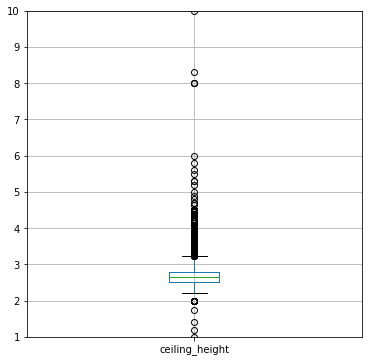

In [23]:
# Построим диаграмму размаха, чтобы посмотреть на "ящик", "усы" и выбросы
data.boxplot(column='ceiling_height', figsize=(6, 6))
plt.ylim(1, 10,3)
plt.show()

***На основе полученной диаграммы можно отметить, что:***

**"Ящиком"** является высота потолков от 2,2 м до 3,2 м. На самом деле, это действительно самая популярный разброс высоты потолков. 

**Медианое** значение - 2,65 м.

Также мы видим, что в **"усы"** попало достаточно много значений до 5 м.

Значения выше 5 м и ниже 2,2 м являются гораздо более редкими, и я назвала бы их **выбросами**.

In [24]:
# Найдем точное медианное значение по высоте потолков
data.query('ceiling_height > 2.2 and ceiling_height < 5')['ceiling_height'].median()

2.65

In [25]:
# Чтобы не терять данные в ceiling_height, преобразуем высоту потолков ниже 2.2 м и выше 5 м в медианную высоту
data.loc[data['ceiling_height'] < 2.2, 'ceiling_height'] = 2.65
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] = 2.65
# Заменим пропуски в ceiling_height на медианную высоту
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)
# Проверим уникальные значения в ceiling_height
data['ceiling_height'].sort_values().unique() 

array([2.2 , 2.25, 2.26, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48, 2.49,
       2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 ,
       2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71,
       2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82,
       2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93,
       2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04,
       3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15,
       3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27,
       3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38,
       3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ,
       3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62,
       3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 ,
       3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95, 3.98,
       4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.2 , 4.

In [26]:
# Также проверим столбец ceiling_height на количество пропусков
data['ceiling_height'].isna().sum()

0

In [27]:
# Проверим уникальные значения в floors_total
data['floors_total'].sort_values().unique() 

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

In [28]:
# Найдем точное медианное значение по этажности домов
data.query('floors_total > 1 and floors_total < 60')['floors_total'].median()

9.0

In [29]:
# Заменим пропуски в floors_total на медианную этажность домов
data['floors_total'] = data['floors_total'].fillna(9.0)
# Также проверим столбец floors_total на количество пропусков
data['floors_total'].isna().sum()

0

In [30]:
# Сделаем проверку, а не превышает ли этаж, на котором находится квартира, значение которого мы заполнили медианным, общую этажность
# Построим сводную таблицу, где отображен этаж квартиры и общая этажность дома
floor_and_floors = data.pivot_table(index = 'last_price', values = ['floors_total', 'floor']).round()
pd.set_option('display.max_rows', None)
# Сначала вручную просмотрим квартиры, расположенные на 9 этаже и общую этажность дома
floor_and_floors = floor_and_floors.query('floor == 9.0')
floor_and_floors

floor  floors_total
last_price                     
1999999       9.0          17.0
2566270       9.0          15.0
2635000       9.0          10.0
2664000       9.0          12.0
2765000       9.0           9.0
2805000       9.0          12.0
2899900       9.0          12.0
2940000       9.0          14.0
2970000       9.0          16.0
3045000       9.0          20.0
3099000       9.0          11.0
3241540       9.0           9.0
3444000       9.0          10.0
3460000       9.0          17.0
3470502       9.0          19.0
3490304       9.0          13.0
3577388       9.0          14.0
3624000       9.0          15.0
3753180       9.0          15.0
3830000       9.0          19.0
3925000       9.0          25.0
3930000       9.0          14.0
4010000       9.0          12.0
4045000       9.0          18.0
4111200       9.0          10.0
4130000       9.0          14.0
4140000       9.0          15.0
4199000       9.0          15.0
4440000       9.0          12.0
4465000       9.0           9.0
4495000       9.0          12.0
4575000       9.0          13.0
4709190       9.0          21.0
4775000       9.0          12.0
4776000       9.0           9.0
4780000       9.0          14.0
5026719       9.0          23.0
5055000       9.0          13.0
5090000       9.0          17.0
5235000       9.0           9.0
5239000       9.0          25.0
5248000       9.0          23.0
5320000       9.0          14.0
5386325       9.0           9.0
5495000       9.0           9.0
5530000       9.0          12.0
5556275       9.0          24.0
5580791       9.0          11.0
5589000       9.0           9.0
5625000       9.0          16.0
5723761       9.0          11.0
5812504       9.0          23.0
5865000       9.0          11.0
5954000       9.0          10.0
5960000       9.0          15.0
6048770       9.0          25.0
6050000       9.0          14.0
6180000       9.0          17.0
6220000       9.0          18.0
6275000       9.0          12.0
6280000       9.0          13.0
6287251       9.0          23.0
6290000       9.0          13.0
6498000       9.0          16.0
6499000       9.0          16.0
6590000       9.0          14.0
6595000       9.0          14.0
6699000       9.0          16.0
6760000       9.0          11.0
6870000       9.0          15.0
6890000       9.0          18.0
6980000       9.0          13.0
7066624       9.0          16.0
7240000       9.0          12.0
7390000       9.0          20.0
7620000       9.0          14.0
7685993       9.0          10.0
7799000       9.0          11.0
7807800       9.0           9.0
7810000       9.0          25.0
7825000       9.0          25.0
7849000       9.0          12.0
7920000       9.0           9.0
8190000       9.0          11.0
8275000       9.0          12.0
8354205       9.0          10.0
8545000       9.0          20.0
8680000       9.0          19.0
8945261       9.0          16.0
8999999       9.0          16.0
9009000       9.0          20.0
9020000       9.0           9.0
9359901       9.0          12.0
9386000       9.0           9.0
9520000       9.0          11.0
9525760       9.0          10.0
9591727       9.0          10.0
9753380       9.0          12.0
9860000       9.0          11.0
10018000      9.0          23.0
10090000      9.0          10.0
10186401      9.0          23.0
10260000      9.0          23.0
10300000      9.0          13.0
10411000      9.0          20.0
10600000      9.0          16.0
10650000      9.0          16.0
10681500      9.0          10.0
10778000      9.0          13.0
10999000      9.0          13.0
11170500      9.0          10.0
11790000      9.0          16.0
11866860      9.0          11.0
11965000      9.0          18.0
11983878      9.0          10.0
12150000      9.0          12.0
12300000      9.0          12.0
12703590      9.0           9.0
13550000      9.0          10.0
13705200      9.0          22.0
13922460      9.0          10.0
14108500      9.0          23.0
14220000      9.0          20.0
15357000    

In [31]:
# На всякий случай еще раз посмотрим, точно ли этаж квартиры не превышает общую этажность дома
floor_and_floors = floor_and_floors.query('floor == 9.0 and floors_total < 9')
floor_and_floors

Empty DataFrame
Columns: [floor, floors_total]
Index: []

In [32]:
# Теперь снова преобразуем данные в столбце floors_total (ранее мы не смогли этого сделать)
data['floors_total'] = data['floors_total'].astype('int64')
# Проверим изменения
data['floors_total'].dtypes

dtype('int64')

In [33]:
# Проверим характерные значения в living_area
data['living_area'].describe()

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [34]:
# Проверим уникальные значения в living_area
data['living_area'].sort_values().unique() 

array([  2. ,   3. ,   5. , ..., 409. , 409.7,   nan])

In [35]:
# Проверим, у какого количества квартир living_area меньше или равно 5 м2
data.query('living_area <= 5')

total_images  last_price  total_area first_day_exposition  rooms  \
3242              7     4440000        41.0           2017-07-02      1   
13915            20     6350000        52.0           2018-02-06      2   
17582            11     2680000        22.0           2018-08-11      0   
21758             0     2330000        23.0           2018-01-01      0   
23574            14    64990000       139.0           2015-11-24      3   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
3242             2.65            17          3.0     17         False   False   
13915            3.00             6          2.0      2         False   False   
17582            2.65            25          5.0      8         False    True   
21758            2.65            24          2.0     22         False    True   
23574            3.00             8          3.0      8         False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
3242       False          11.0        0  Санкт-Петербург           19272.0   
13915      False           9.0        0  Санкт-Петербург           32453.0   
17582      False           NaN        2  Санкт-Петербург           22735.0   
21758      False           NaN        0   поселок Мурино               NaN   
23574      False          16.0        1  Санкт-Петербург           33255.0   

       city_centers_nearest  parks_around_3000  parks_nearest  \
3242                13073.0                0.0            NaN   
13915                6521.0                0.0            NaN   
17582               11618.0                1.0          835.0   
21758                   NaN                NaN            NaN   
23574                5975.0                1.0          630.0   

       ponds_around_3000  ponds_nearest  days_exposition  
3242                 0.0            NaN            216.0  
13915                1.0         1012.0             91.0  
17582                1.0          652.0             70.0  
21758                NaN            NaN             66.0  
23574                3.0          100.0            280.0

***На основе полученных данных можно отметить, что:***

Значения 2-5 м2 в living_area явно являются ошибкой. Заменим эти значения на None.

Про пропуски в данном столбце можно сказать, что скорее всего, некоторые пользователи не указали метраж жилой зоны, потому что они считают, что данных об общей площади квартиры достаточно, или же они не хотят заморачиваться и измерять каждую комнату по отдельности. При этом заполнять пропуски медианными значениями будет неправильно. Поэтому можно заменить пропуски на None. 

In [36]:
# Заменим пропуски в living_area на None
data['living_area'] = data['living_area'].fillna(0)
data.loc[data['living_area'] == 0, 'living_area'] = None
# Заменим О в living_area на None
data.loc[data['living_area'] <= 5, 'living_area'] = None
# Проверим еще раз характерные значения в living_area
data['living_area'].describe()

count    21747.000000
mean        34.455586
std         22.035031
min          5.400000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [37]:
# Проверим характерные значения в kitchen_area
data['kitchen_area'].describe() 

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [38]:
# Выведем первые пять строк таблицы, обратим внимание на строку со значением NaN в kitchen_area
data.head(5)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16         51.0      8         False   False   
1            2.65            11         18.6      1         False   False   
2            2.65             5         34.3      4         False   False   
3            2.65            14          NaN      9         False   False   
4            3.03            14         32.0     13         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0        0  Санкт-Петербург           18863.0   
1      False          11.0        2   поселок Шушары           12817.0   
2      False           8.3        0  Санкт-Петербург           21741.0   
3      False           NaN        0  Санкт-Петербург           28098.0   
4      False          41.0        0  Санкт-Петербург           31856.0   

   city_centers_nearest  parks_around_3000  parks_nearest  ponds_around_3000  \
0               16028.0                1.0          482.0                2.0   
1               18603.0                0.0            NaN                0.0   
2               13933.0                1.0           90.0                2.0   
3                6800.0                2.0           84.0                3.0   
4                8098.0                2.0          112.0                1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0

***На основе полученных данных можно отметить, что:***

Минимальная площадь кухни - 1.3 м2. Такие кухни могут быть в маленьких квартирках, например, студиях, где все находится в одном пространстве. Однако в ячейки, где отсутсвуют значения по метражу кухонь, я не могу поставить такое минимальное значение по причине того, что пропуски могут быть, например, в больших квартирах площадью 159 м2. И кухня площадью 1.3 м2 там была бы просто неуместна, и информация в таблице будет выглядеть странно. 

Медианная площадь кухни - 9.1 м2. Однако в ячейки, где отсутсвуют значения по метражу кухонь, я не могу поставить медианное значение по причине того, что пропуски могут быть, например, в маленьких квартирах-квартирах студиях площадью 20 м2. И кухня площадью 9.1 м2 там просто невозможна.

Исходя из данной информации, я думаю, что лучше всего будет заменить пропуски нулевыми значениями.

In [39]:
# Заменим пропуски в kitchen_area на нулевые значения
data['kitchen_area'] = data['kitchen_area'].fillna(0)
# Также проверим столбец kitchen_area на количество пропусков
data['kitchen_area'].isna().sum()

0

In [40]:
# Проверим характерные значения в airports_nearest
data['airports_nearest'].describe()

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [41]:
# Проверим, у какого количества квартир расстояние до аэропорта равно 0
data.query('airports_nearest == 0')

total_images  last_price  total_area first_day_exposition  rooms  \
21085             0     7000000        34.7           2018-09-23      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
21085             2.7             9         19.8      3         False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
21085      False           6.0        2  Санкт-Петербург               0.0   

       city_centers_nearest  parks_around_3000  parks_nearest  \
21085               22801.0                0.0            NaN   

       ponds_around_3000  ponds_nearest  days_exposition  
21085                0.0            NaN             60.0

In [42]:
# Выведем первые 10 строк таблицы, обратим внимание на строку со значением NaN в airports_nearest
data.head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000      108.00           2019-03-07      3   
1             7     3350000       40.40           2018-12-04      1   
2            10     5196000       56.00           2015-08-20      2   
3             0    64900000      159.00           2015-07-24      3   
4             2    10000000      100.00           2018-06-19      2   
5            10     2890000       30.40           2018-09-10      1   
6             6     3700000       37.30           2017-11-02      1   
7             5     7915000       71.60           2019-04-18      2   
8            20     2900000       33.16           2018-05-23      1   
9            18     5400000       61.00           2017-02-26      3   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16        51.00      8         False   False   
1            2.65            11        18.60      1         False   False   
2            2.65             5        34.30      4         False   False   
3            2.65            14          NaN      9         False   False   
4            3.03            14        32.00     13         False   False   
5            2.65            12        14.40      5         False   False   
6            2.65            26        10.60      6         False   False   
7            2.65            24          NaN     22         False   False   
8            2.65            27        15.43     26         False   False   
9            2.50             9        43.60      7         False   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False         25.00        0            Санкт-Петербург   
1      False         11.00        2             поселок Шушары   
2      False          8.30        0            Санкт-Петербург   
3      False          0.00        0            Санкт-Петербург   
4      False         41.00        0            Санкт-Петербург   
5      False          9.10        0  городской поселок Янино-1   
6      False         14.40        1          поселок Парголово   
7      False         18.90        2            Санкт-Петербург   
8      False          8.81        0             поселок Мурино   
9      False          6.50        2            Санкт-Петербург   

   airports_nearest  city_centers_nearest  parks_around_3000  parks_nearest  \
0           18863.0               16028.0                1.0          482.0   
1           12817.0               18603.0                0.0            NaN   
2           21741.0               13933.0                1.0           90.0   
3           28098.0                6800.0                2.0           84.0   
4           31856.0                8098.0                2.0          112.0   
5               NaN                   NaN                NaN            NaN   
6           52996.0               19143.0                0.0            NaN   
7           23982.0               11634.0                0.0            NaN   
8               NaN                   NaN                NaN            NaN   
9           50898.0               15008.0                0.0            NaN   

   ponds_around_3000  ponds_nearest  days_exposition  
0                2.0          755.0              NaN  
1                0.0            NaN             81.0  
2                2.0          574.0            558.0  
3                3.0          234.0            424.0  
4                1.0           48.0            121.0  
5                NaN            NaN             55.0  
6                0.0            NaN            155.0  
7                0.0            NaN              NaN  
8                NaN            NaN            189.0  
9                0.0            NaN            289.0

***На основе полученных данных можно отметить, что:***

Минимальное расстояние до аэропорта - 0 м. В такие значения попадает одна квартира. Но такого расстояния быть не может, соответсвенно, это ошибка. Заменим это значение на None.

Про пропуски в данном столбце можно сказать, что возможно, они связаны с тем, что аэропорт находится далеко от определенных объектов недвижимости и картографических данных на счет расстояния от этих объектов нет. Или же мог произойти сбой при выгрузке данных. При этом заполнять пропуски медианными значениями будет неправильно, так как расстояние до аэропорта, в отличии от высоты потолков в домах, имеет гораздо более высокий разброс. Поэтому можно заменить пропуски на None.

In [43]:
# Заменим пропуски в airports_nearest на None
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = None
# Заменим О в airports_nearest на None
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = None
# Проверим еще раз характерные значения в airports_nearest
data['airports_nearest'].describe()

count    18115.000000
mean     28804.815898
std      12635.850683
min       6450.000000
25%      18576.000000
50%      26757.000000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [44]:
# Также проверим столбец airports_nearest на количество пропусков
data['airports_nearest'].isna().sum()

5535

***Данные пропуски мы оставим*** 

In [45]:
# Проверим уникальные значения в parks_around_3000
data['parks_around_3000'].sort_values().unique() 

array([ 0.,  1.,  2.,  3., nan])

***На основе полученных данных можно отметить, что:***

Возможно, по близости с некоторыми объектами просто нет парков. Поэтому данные в ячейках отсутствуют. Пропущенные значения стоит заменить на нулевые.

In [46]:
# Заменим пропуски в parks_around_3000 на нулевые значения
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
# Также проверим столбец parks_around_3000 на количество пропусков
data['parks_around_3000'].isna().sum()

0

In [47]:
# Теперь снова преобразуем данные в столбце parks_around_3000 (ранее мы не смогли этого сделать)
data['parks_around_3000'] = data['parks_around_3000'].astype('int64')
# Проверим изменения
data['parks_around_3000'].dtypes

dtype('int64')

In [48]:
# Проверим уникальные значения в ponds_around_3000
data['ponds_around_3000'].sort_values().unique() 

array([ 0.,  1.,  2.,  3., nan])

***На основе полученных данных можно отметить, что:***

Аналогично с парками, возможно, по близости с некоторыми объектами просто нет прудов. Поэтому данные в ячейках отсутствуют. Пропущенные значения стоит заменить на нулевые.

In [49]:
# Заменим пропуски в ponds_around_3000 на нулевые значения
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
# Также проверим столбец ponds_around_3000 на количество пропусков
data['ponds_around_3000'].isna().sum()

0

In [50]:
# Теперь снова преобразуем данные в столбце ponds_around_3000 (ранее мы не смогли этого сделать)
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int64')
# Проверим изменения
data['ponds_around_3000'].dtypes

dtype('int64')

In [51]:
# Проверим характерные значения в parks_nearest
data['parks_nearest'].describe() 

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [52]:
# Еще раз посмотрим количество пропусков в parks_nearest
data['parks_nearest'].isna().sum()

15586

In [53]:
# Сравним пропуски в parks_nearest с данными в parks_around_3000
data.head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000      108.00           2019-03-07      3   
1             7     3350000       40.40           2018-12-04      1   
2            10     5196000       56.00           2015-08-20      2   
3             0    64900000      159.00           2015-07-24      3   
4             2    10000000      100.00           2018-06-19      2   
5            10     2890000       30.40           2018-09-10      1   
6             6     3700000       37.30           2017-11-02      1   
7             5     7915000       71.60           2019-04-18      2   
8            20     2900000       33.16           2018-05-23      1   
9            18     5400000       61.00           2017-02-26      3   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16        51.00      8         False   False   
1            2.65            11        18.60      1         False   False   
2            2.65             5        34.30      4         False   False   
3            2.65            14          NaN      9         False   False   
4            3.03            14        32.00     13         False   False   
5            2.65            12        14.40      5         False   False   
6            2.65            26        10.60      6         False   False   
7            2.65            24          NaN     22         False   False   
8            2.65            27        15.43     26         False   False   
9            2.50             9        43.60      7         False   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False         25.00        0            Санкт-Петербург   
1      False         11.00        2             поселок Шушары   
2      False          8.30        0            Санкт-Петербург   
3      False          0.00        0            Санкт-Петербург   
4      False         41.00        0            Санкт-Петербург   
5      False          9.10        0  городской поселок Янино-1   
6      False         14.40        1          поселок Парголово   
7      False         18.90        2            Санкт-Петербург   
8      False          8.81        0             поселок Мурино   
9      False          6.50        2            Санкт-Петербург   

   airports_nearest  city_centers_nearest  parks_around_3000  parks_nearest  \
0           18863.0               16028.0                  1          482.0   
1           12817.0               18603.0                  0            NaN   
2           21741.0               13933.0                  1           90.0   
3           28098.0                6800.0                  2           84.0   
4           31856.0                8098.0                  2          112.0   
5               NaN                   NaN                  0            NaN   
6           52996.0               19143.0                  0            NaN   
7           23982.0               11634.0                  0            NaN   
8               NaN                   NaN                  0            NaN   
9           50898.0               15008.0                  0            NaN   

   ponds_around_3000  ponds_nearest  days_exposition  
0                  2          755.0              NaN  
1                  0            NaN             81.0  
2                  2          574.0            558.0  
3                  3          234.0            424.0  
4                  1           48.0            121.0  
5                  0            NaN             55.0  
6                  0            NaN            155.0  
7                  0            NaN              NaN  
8                  0            NaN            189.0  
9                  0            NaN            289.0

***На основе полученных данных можно отметить, что:***

Пропуски в parks_nearest составляют 65% об общего количества данных в этой графе. Возможно, или при выгрузке произошел сбой. Также заметна закономерность: если в графе parks_around_3000 по близости находится 0 парков, то в графе parks_nearest расстояние до ближайшего парка также отсутстует. Значит, все парки находятся на расстоянии более 3000 м. **Поэтому мы просто заменим пропуски в parks_nearest на нулевые значения.**

In [54]:
# Заменим пропуски в parks_nearest на None
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data.loc[data['parks_nearest'] == 0, 'parks_nearest'] = None
# Проверим уникальные значения в parks_nearest
data['parks_nearest'].sort_values().unique() 

array([1.000e+00, 3.000e+00, 4.000e+00, 7.000e+00, 9.000e+00, 1.000e+01,
       1.100e+01, 1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01,
       1.700e+01, 1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01,
       2.300e+01, 2.400e+01, 2.700e+01, 2.800e+01, 3.000e+01, 3.200e+01,
       3.300e+01, 3.400e+01, 3.500e+01, 3.600e+01, 3.700e+01, 3.800e+01,
       3.900e+01, 4.000e+01, 4.100e+01, 4.200e+01, 4.300e+01, 4.400e+01,
       4.500e+01, 4.600e+01, 4.700e+01, 4.800e+01, 4.900e+01, 5.000e+01,
       5.100e+01, 5.200e+01, 5.300e+01, 5.400e+01, 5.500e+01, 5.600e+01,
       5.700e+01, 5.800e+01, 5.900e+01, 6.000e+01, 6.100e+01, 6.200e+01,
       6.300e+01, 6.400e+01, 6.500e+01, 6.600e+01, 6.800e+01, 6.900e+01,
       7.100e+01, 7.200e+01, 7.300e+01, 7.400e+01, 7.500e+01, 7.600e+01,
       7.700e+01, 7.800e+01, 8.000e+01, 8.100e+01, 8.200e+01, 8.300e+01,
       8.400e+01, 8.500e+01, 8.600e+01, 8.700e+01, 8.800e+01, 9.000e+01,
       9.100e+01, 9.200e+01, 9.300e+01, 9.400e+01, 

In [55]:
# Проверим характерные значения в ponds_nearest
data['ponds_nearest'].describe() 

count    9085.000000
mean      518.059879
std       277.841733
min        13.000000
25%       293.000000
50%       502.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [56]:
# Еще раз посмотрим количество пропусков в ponds_nearest
data['ponds_nearest'].isna().sum()

14565

In [57]:
# Сравним пропуски в ponds_nearest с данными в ponds_around_3000
data.head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000      108.00           2019-03-07      3   
1             7     3350000       40.40           2018-12-04      1   
2            10     5196000       56.00           2015-08-20      2   
3             0    64900000      159.00           2015-07-24      3   
4             2    10000000      100.00           2018-06-19      2   
5            10     2890000       30.40           2018-09-10      1   
6             6     3700000       37.30           2017-11-02      1   
7             5     7915000       71.60           2019-04-18      2   
8            20     2900000       33.16           2018-05-23      1   
9            18     5400000       61.00           2017-02-26      3   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16        51.00      8         False   False   
1            2.65            11        18.60      1         False   False   
2            2.65             5        34.30      4         False   False   
3            2.65            14          NaN      9         False   False   
4            3.03            14        32.00     13         False   False   
5            2.65            12        14.40      5         False   False   
6            2.65            26        10.60      6         False   False   
7            2.65            24          NaN     22         False   False   
8            2.65            27        15.43     26         False   False   
9            2.50             9        43.60      7         False   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False         25.00        0            Санкт-Петербург   
1      False         11.00        2             поселок Шушары   
2      False          8.30        0            Санкт-Петербург   
3      False          0.00        0            Санкт-Петербург   
4      False         41.00        0            Санкт-Петербург   
5      False          9.10        0  городской поселок Янино-1   
6      False         14.40        1          поселок Парголово   
7      False         18.90        2            Санкт-Петербург   
8      False          8.81        0             поселок Мурино   
9      False          6.50        2            Санкт-Петербург   

   airports_nearest  city_centers_nearest  parks_around_3000  parks_nearest  \
0           18863.0               16028.0                  1          482.0   
1           12817.0               18603.0                  0            NaN   
2           21741.0               13933.0                  1           90.0   
3           28098.0                6800.0                  2           84.0   
4           31856.0                8098.0                  2          112.0   
5               NaN                   NaN                  0            NaN   
6           52996.0               19143.0                  0            NaN   
7           23982.0               11634.0                  0            NaN   
8               NaN                   NaN                  0            NaN   
9           50898.0               15008.0                  0            NaN   

   ponds_around_3000  ponds_nearest  days_exposition  
0                  2          755.0              NaN  
1                  0            NaN             81.0  
2                  2          574.0            558.0  
3                  3          234.0            424.0  
4                  1           48.0            121.0  
5                  0            NaN             55.0  
6                  0            NaN            155.0  
7                  0            NaN              NaN  
8                  0            NaN            189.0  
9                  0            NaN            289.0

***На основе полученных данных можно отметить, что:***

Пропуски в ponds_nearest составляют 61% об общего количества данных в этой графе. Возможно, или при выгрузке произошел сбой. Также заметна закономерность: если в графе ponds_around_3000 по близости находится 0 прудов, то в графе ponds_nearest расстояние до ближайшего пруда также отсутстует. Значит, по близости к объекту нет прудов. Можно было бы заполнить пропуски медианными значениями, но свыше 3000 м, однако, мы не сможем этого сделать. Причина в том, что максимальное расстояние до пруда, которое содержится у нас в таблице, составляет 1344 м. Поэтому мы просто заменим пропуски в ponds_nearest на нулевые значения.

In [58]:
# Заменим пропуски в ponds_nearest на нулевые значения
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
# Также проверим столбец ponds_nearest на количество пропусков
data['ponds_nearest'].isna().sum()

0

In [59]:
# Проверим характерные значения в days_exposition
data['days_exposition'].describe() 

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [60]:
# Еще раз посмотрим количество пропусков в days_exposition
data['days_exposition'].isna().sum()

3180

***На основе полученных данных можно отметить, что:***

Скорее всего, 3180 объявлений в таблице все еще являются актуальными. Данные пропуски мы оставим.

In [61]:
# Проверим характерные значения в last_price
data['last_price'].describe().astype(int)

count        23650
mean       6541126
std       10896399
min          12190
25%        3400000
50%        4650000
75%        6799000
max      763000000
Name: last_price, dtype: int64

***На основе полученных данных можно отметить, что:***

Есть аномалии. Минимальная стоимость квартир составляет 12 190 р., а максимальная - 763 000 000 р., что говорит о том, что во-первых разброс цен большой, что-то из таких данных в итоге может оказаться выбросом, во-вторых стоит проверить такие минимальные цены на квартиры, это может просто оказаться ошибкой при заполнении объявления.

In [62]:
# Проверим, у какого количества квартир стоимость менее 450 000
data.query('last_price < 450000')

total_images  last_price  total_area first_day_exposition  rooms  \
8793              7       12190       109.0           2019-03-20      2   
14911             5      430000        54.0           2018-06-26      2   
16274            18      440000        40.0           2018-07-10      1   
17456             7      430000        30.4           2019-04-22      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
8793             2.75            25         32.0     25         False   False   
14911            2.65             3          NaN      3         False   False   
16274            2.65             5          NaN      1         False   False   
17456            2.65             2         16.0      1         False   False   

       open_plan  kitchen_area  balcony          locality_name  \
8793       False          40.5        0        Санкт-Петербург   
14911      False           0.0        0  поселок станции Свирь   
16274      False           0.0        0     деревня Старополье   
17456      False           6.0        0                 Сланцы   

       airports_nearest  city_centers_nearest  parks_around_3000  \
8793            36421.0                9176.0                  1   
14911               NaN                   NaN                  0   
16274               NaN                   NaN                  0   
17456               NaN                   NaN                  0   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  
8793           805.0                  0            0.0              8.0  
14911            NaN                  0            0.0             44.0  
16274            NaN                  0            0.0             45.0  
17456            NaN                  0            0.0              NaN

In [63]:
# Проверим, у какого количества квартир стоимость более 30 000 000
data.query('last_price > 30000000')

total_images  last_price  total_area first_day_exposition  rooms  \
3                 0    64900000      159.00           2015-07-24      3   
51                7    45000000      161.00           2017-10-17      3   
121              20    33000000      180.00           2017-02-17      3   
155               8    96000000      317.00           2017-07-07      4   
262              14    37500000      158.00           2019-01-24      4   
263              12    39900000      140.60           2016-11-19      2   
282              17    37000000      115.00           2018-11-15      2   
411               1    40662000      151.00           2014-12-09      3   
464              15    66571000      280.30           2015-06-11      6   
492              18    95000000      216.00           2017-12-05      4   
509               5    90000000      225.00           2016-06-26      6   
581              20    65000000      365.00           2019-03-18      7   
612              18    35000000      135.00           2017-06-17      3   
643               6    33300000      109.30           2018-02-16      2   
660               3    49950000      483.90           2017-10-04      7   
674              11    50000000      131.10           2019-02-11      4   
742               7    37000000      161.00           2016-05-22      3   
793              20   135000000      310.00           2018-05-22      4   
824              20    46950000      165.00           2018-11-06      5   
1026             20   155000000      310.00           2018-10-12      5   
1085             16    75000000      323.00           2017-07-10      5   
1109              1    34878556       95.80           2014-12-09      2   
1188             20   118000000      290.60           2018-06-01      6   
1254              1    36001900      142.30           2017-08-25      3   
1300             14   120000000      280.00           2018-07-12      5   
1388             20    59800000      399.00           2015-01-21      5   
1436             19   330000000      190.00           2018-04-04      3   
1494             10    65000000      364.00           2018-11-27      7   
1624             20    31500000      237.80           2017-04-09      5   
1706             10    62171920      200.30           2018-05-19      3   
1766             18    53800000      201.00           2017-07-17      5   
1808             19    59914124      274.65           2017-07-10      6   
1810              9    30877260      127.60           2018-10-12      4   
1928             11   125000000      224.50           2017-01-24      4   
1944              8    55800000      125.00           2015-12-17      2   
2069              7    77000000      228.00           2017-04-09      4   
2123             20    54000000      145.90           2017-08-23      3   
2127             14    32500000      234.00           2016-05-26      5   
2201              2    31500000      136.36           2018-03-31      3   
2243              9   130278280      304.00           2015-07-24      5   
2356             11    50000000      128.00           2016-06-24      3   
2469             20    37500000      240.00           2017-07-10      5   
2536             16   159984000      242.40           2015-08-27      4   
2580              6    30900000      338.60           2017-10-16      7   
2905             19    39900000      125.00           2017-12-13      4   
3017              6    50000000      145.00           2018-08-10      5   
3043             11    33000000      240.00           2018-08-20      6   
3056             20    45900000      143.00           2014-12-09      2   
3116             19    37000000      172.00           2017-11-12      4   
3117             19   140000000      631.00           2019-03-30      7   
3146              8    33000000      232.00           2019-01-23      5   
3159              7    37000000      155.20           2016-09-07      3   
3250              8    30500000 

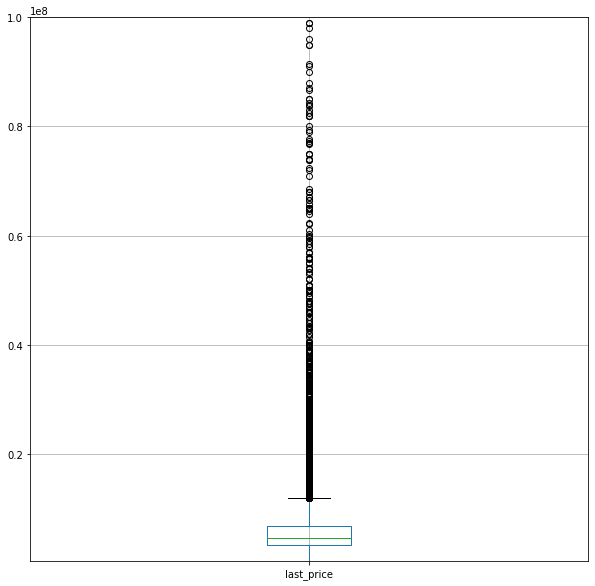

In [64]:
# Построим диаграмму размаха, чтобы посмотреть на "ящик", "усы" и выбросы
data.boxplot(column='last_price', figsize=(10, 10))
plt.ylim(400000, 100000000)
plt.show()

***На основе полученной диаграммы можно отметить, что:***

"Ящиком" является стоимость квартир от примерно 550 000 р. до 1 200 000 р.

Медианое значение - примерно 650 000 р.

Также мы видим, что в "усы" попало достаточно много значений до 40 000 000 р.

Значения выше 30 000 000 я назвала бы их выбросами, таких квартир всего 316 и это более редкий вариант. Также выброс - квартира за 12 190р.

In [65]:
# Удалим выбросы в last_price и выполним проверку
data = data.loc[data['last_price'] != 12190]
data = data.query('last_price < 30000000')
data['last_price'].describe().astype(int)

count       23323
mean      5730857
std       4009396
min        430000
25%       3400000
50%       4600000
75%       6650000
max      29999000
Name: last_price, dtype: int64

In [66]:
# Проверим уникальные значения в rooms
data['rooms'].sort_values().unique() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14, 16])

In [67]:
# Проверим, у какого количества квартир 0 комнат и посмотрим на общую площадь этих квартир
data.query('rooms == 0')

total_images  last_price  total_area first_day_exposition  rooms  \
144               1     2450000       27.00           2017-03-30      0   
349               4     2320000       25.00           2017-09-27      0   
440               8     2480000       27.11           2018-03-12      0   
508               0     3375000       34.40           2017-03-28      0   
608               2     1850000       25.00           2019-02-20      0   
697              12     2500000       24.10           2017-12-01      0   
716               5     1500000       17.00           2017-06-07      0   
780               9     2600000       26.10           2018-02-20      0   
839              14     1900000       35.00           2017-04-14      0   
946               5     2200000       23.00           2016-09-27      0   
1173             12     3240000       29.00           2018-10-30      0   
1174              3     3900000       32.00           2016-10-18      0   
1220              5     3300000       27.00           2017-11-10      0   
1260              0     2600000       27.00           2018-07-20      0   
1277             10     3150000       26.00           2017-07-14      0   
1528              8     1950000       31.00           2019-01-29      0   
1574              0     2200000       22.00           2017-11-03      0   
1600             11     2550000       30.00           2017-11-10      0   
1625              7     1980000       23.98           2018-02-01      0   
2055             14     2300000       29.00           2018-03-29      0   
2103              8     2900000       25.00           2019-02-21      0   
2166              6     2400000       23.00           2018-08-14      0   
2270             19     3550000       27.55           2017-12-06      0   
2409              4     1980000       27.00           2018-03-23      0   
2475              4     2000000       27.00           2018-09-07      0   
2532              5     3500000       27.10           2018-02-01      0   
2563              4     3170000       28.40           2018-07-26      0   
2719             18     2400000       25.00           2017-08-16      0   
2727              4     3670000       26.49           2018-07-26      0   
2991              3     3700000       28.90           2017-11-09      0   
3019             18     2100000       24.00           2017-11-10      0   
3147              7     2170000       31.00           2017-12-30      0   
3435              7     2800000       29.00           2017-12-10      0   
3458              6     7400000       73.60           2017-05-18      0   
3874             13     1700000       21.40           2015-02-11      0   
3896              3     3200000       26.00           2017-08-14      0   
4115              7     2600000       24.00           2018-02-01      0   
4319             13     3600000       27.00           2017-12-07      0   
4437             10     3200000       25.00           2017-10-16      0   
4683              2     3650000       35.00           2018-02-01      0   
4876              7     3000000       25.00           2017-09-27      0   
4901              5     2200000       24.00           2018-10-22      0   
4930              6     2176000       23.00           2017-12-08      0   
4955             12     3150000       25.00           2018-05-07      0   
4971             11     4300000       29.30           2017-07-14      0   
5074             18     3500000       28.00           2017-07-10      0   
5187              5     3300000       25.40           2018-11-02      0   
5188              0     3450000       25.00           2019-04-04      0   
5290              7     4090000       24.00           2017-11-16      0   
5312              3     1800000       20.00           2018-02-01      0   
5749             20     3590000       25.00           2017-08-30      0   
5855              3      945750       19.50           2017-09-18      0   
5958              1     3200000 

In [68]:
# Проверим, другие продполагаемые квартиры-студии
data.query('27 <= total_area <= 30')

total_images  last_price  total_area first_day_exposition  rooms  \
70                9     3400000       30.00           2018-09-05      1   
94                3     3500000       29.50           2019-04-26      1   
143               9     2990000       30.00           2016-06-08      1   
144               1     2450000       27.00           2017-03-30      0   
237               4     2438033       28.10           2016-11-23      1   
259               6      900000       30.00           2017-11-21      1   
296               4     1690000       28.00           2017-08-09      1   
317               9     3050000       29.40           2018-02-27      1   
341               0     2950000       30.00           2017-11-21      1   
366              10     3400000       29.90           2017-12-21      1   
418               5     3100000       30.00           2018-02-21      1   
440               8     2480000       27.11           2018-03-12      0   
476               9     1634000       28.30           2017-11-10      1   
556               0     3500000       28.50           2018-06-06      1   
637              11     2699000       30.00           2019-04-18      1   
732              20     3950000       29.80           2018-08-03      1   
739              12     3200000       28.20           2015-08-31      1   
774               9     2500000       30.00           2018-10-15      1   
875              11     3000000       30.00           2018-11-27      1   
895               8     2650000       28.00           2016-02-16      1   
906              15     2600000       27.00           2017-07-10      1   
1001              6     2500000       30.00           2018-06-30      1   
1032             12     3400000       29.00           2019-03-11      1   
1034             11     3400000       29.00           2015-07-07      1   
1053             13      550000       29.00           2018-02-01      1   
1116             12     3490000       29.00           2017-10-21      1   
1173             12     3240000       29.00           2018-10-30      0   
1210              7     4550000       29.80           2019-03-15      1   
1220              5     3300000       27.00           2017-11-10      0   
1225             11     3000000       28.00           2017-10-03      1   
1260              0     2600000       27.00           2018-07-20      0   
1358             10      550000       27.60           2019-03-06      1   
1360             15     1080000       29.20           2019-04-22      1   
1485              4     3550000       30.00           2017-11-03      1   
1591             10     1700000       29.70           2018-08-28      1   
1600             11     2550000       30.00           2017-11-10      0   
1636              7     2150000       28.90           2018-11-16      1   
1645              5     1625000       27.00           2018-02-13      1   
1656              4     3050000       28.00           2019-02-26      1   
1697             11     3550000       28.00           2018-02-08      1   
1746              9      800000       29.00           2018-09-12      1   
1753              8     1150000       29.40           2019-02-18      1   
1775              9     2800000       30.00           2017-06-22      1   
1861              6      600000       30.00           2017-12-19      1   
1874              5     2050000       30.00           2017-05-05      1   
1932              9     2850000       30.00           2019-02-07      1   
2027              8     3990000       30.00           2017-11-09      1   
2055             14     2300000       29.00           2018-03-29      0   
2095              6     1250000       29.40           2017-10-07      1   
2110              0     2400000       29.00           2017-08-31      1   
2128              5     2100000       30.00           2018-10-31      1   
2161             17     3000000       30.00           2016-06-15      1   
2167             13     3300000 

***На основе полученных данных можно отметить, что:***

Скорее всего 0 комнат имеют отношение к квартирам-студиям. Для этих квартир-студий также характерен нулевой метраж кухни, так как данная зона совсем маленькая.

Однако, проверив другие квартиры-студии, мы все же видим, что кто-то из пользователей указывает 1 в числе комнат. И думаю, это верно, ведь по факту одна общая комната в квартире есть. Изменим данные.

In [69]:
# Заменим 0 в rooms на 1 и проверим 
data.loc[data['rooms'] == 0, 'rooms'] = 1
# Проверим еще раз характерные значения в rooms
data['rooms'].describe()

count    23323.000000
mean         2.047207
std          1.014918
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

In [70]:
# Проверим общие данные
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23323 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23323 non-null  int64         
 1   last_price            23323 non-null  int64         
 2   total_area            23323 non-null  float64       
 3   first_day_exposition  23323 non-null  datetime64[ns]
 4   rooms                 23323 non-null  int64         
 5   ceiling_height        23323 non-null  float64       
 6   floors_total          23323 non-null  int64         
 7   living_area           21458 non-null  float64       
 8   floor                 23323 non-null  int64         
 9   is_apartment          23323 non-null  bool          
 10  studio                23323 non-null  bool          
 11  open_plan             23323 non-null  bool          
 12  kitchen_area          23323 non-null  float64       
 13  balcony         

***Вывод***

1.Привели столбцы к единому стилю.

2.Изменили типы данных.

3.Исправили явные и неявные дубликаты.

4.Заполнили пропуски, но в четырех графах мы их намеренно сохранили.

5.Обработали аномалии и избавились от вбросов.

6.Поняли, что большое количество картографических данных было утрачено, скорее всего, при выгрузке таблицы. На этот счет можно было бы поставить коллег в известность. 


### Посчитайте и добавьте в таблицу новые столбцы

In [71]:
# Добавим в таблицу столбец с ценой одного квадратного метра
data['one_square_meter_price'] = data['last_price'] / data['total_area']
# Округляем цену до копеек
data['one_square_meter_price'] = data['one_square_meter_price'].round(1)
# Проверим наличие нового столбца и значений в нем
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
4             2    10000000       100.0           2018-06-19      2   
5            10     2890000        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16         51.0      8         False   False   
1            2.65            11         18.6      1         False   False   
2            2.65             5         34.3      4         False   False   
4            3.03            14         32.0     13         False   False   
5            2.65            12         14.4      5         False   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False          25.0        0            Санкт-Петербург   
1      False          11.0        2             поселок Шушары   
2      False           8.3        0            Санкт-Петербург   
4      False          41.0        0            Санкт-Петербург   
5      False           9.1        0  городской поселок Янино-1   

   airports_nearest  city_centers_nearest  parks_around_3000  parks_nearest  \
0           18863.0               16028.0                  1          482.0   
1           12817.0               18603.0                  0            NaN   
2           21741.0               13933.0                  1           90.0   
4           31856.0                8098.0                  2          112.0   
5               NaN                   NaN                  0            NaN   

   ponds_around_3000  ponds_nearest  days_exposition  one_square_meter_price  
0                  2          755.0              NaN                120370.4  
1                  0            0.0             81.0                 82920.8  
2                  2          574.0            558.0                 92785.7  
4                  1           48.0            121.0                100000.0  
5                  0            0.0             55.0                 95065.8

In [72]:
# Добавим в таблицу столбец с днем публикации объявления (0 - понедельник, 1 - вторник и т.д.)
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [73]:
# Добавим в таблицу столбец с месяцем публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

In [74]:
# Добавим в таблицу столбец с годом публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

In [75]:
# Проверим наличие новых столбцов и значений в них
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
4             2    10000000       100.0           2018-06-19      2   
5            10     2890000        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16         51.0      8         False   False   
1            2.65            11         18.6      1         False   False   
2            2.65             5         34.3      4         False   False   
4            3.03            14         32.0     13         False   False   
5            2.65            12         14.4      5         False   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False          25.0        0            Санкт-Петербург   
1      False          11.0        2             поселок Шушары   
2      False           8.3        0            Санкт-Петербург   
4      False          41.0        0            Санкт-Петербург   
5      False           9.1        0  городской поселок Янино-1   

   airports_nearest  city_centers_nearest  parks_around_3000  parks_nearest  \
0           18863.0               16028.0                  1          482.0   
1           12817.0               18603.0                  0            NaN   
2           21741.0               13933.0                  1           90.0   
4           31856.0                8098.0                  2          112.0   
5               NaN                   NaN                  0            NaN   

   ponds_around_3000  ponds_nearest  days_exposition  one_square_meter_price  \
0                  2          755.0              NaN                120370.4   
1                  0            0.0             81.0                 82920.8   
2                  2          574.0            558.0                 92785.7   
4                  1           48.0            121.0                100000.0   
5                  0            0.0             55.0                 95065.8   

   weekday_exposition  month_exposition  year_exposition  
0                   3                 3             2019  
1                   1                12             2018  
2                   3                 8             2015  
4                   1                 6             2018  
5                   0                 9             2018

In [76]:
# Создадим функцию категоризации по этажным диапазонам 
def type_of_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    """
    Возвращает тип этажа квартиры по значению этажа, используя правила:
    - 'первый', если floor == 1;
    - 'последний', если floor == floors_total;
    - 'другой' — от 2 этажа и до предпоследнего.
    """
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
# Добавим в таблицу столбец с типом этажа квартиры
data['type_of_floor'] = data.apply(type_of_floor, axis=1)

In [77]:
# Проверим наличие нового столбца и значений в нем
data.sample(10)

total_images  last_price  total_area first_day_exposition  rooms  \
10937            11     5450000        72.0           2017-10-07      3   
6376              9     7370000        77.0           2016-03-25      2   
9869             12     5300000        62.0           2015-12-02      2   
11776             7     3650000        44.7           2018-06-01      2   
4550              3     8060000        63.3           2018-03-06      2   
5046             20     4200000        34.5           2019-03-25      1   
16942             0     3400000        35.7           2016-06-08      1   
3219              7     2250000        30.1           2018-10-16      1   
2085             12     3900000        40.0           2017-08-31      1   
15476             2     2800000        38.0           2017-03-01      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
10937            2.60             9         43.0      8         False   False   
6376             2.65             6         47.1      2         False   False   
9869             2.80            17         30.0      1         False   False   
11776            2.50             5         27.4      5         False   False   
4550             2.65            24         33.7      4         False   False   
5046             2.50             9         20.0      9         False   False   
16942            2.65            24         16.7     15         False   False   
3219             2.50             5         17.3      5         False   False   
2085             2.65            17          NaN     16         False   False   
15476            2.65             6         18.0      6         False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
10937      False          8.00        1  Санкт-Петербург           25413.0   
6376       False         10.40        0  Санкт-Петербург           23181.0   
9869       False         12.50        0  Санкт-Петербург           17209.0   
11776      False          6.50        0  Санкт-Петербург           48910.0   
4550       False         13.00        0  Санкт-Петербург            7399.0   
5046       False          8.40        2  Санкт-Петербург           42370.0   
16942      False          8.65        0   поселок Шушары           12678.0   
3219       False          5.40        1     Красное Село           24737.0   
2085       False          0.00        0  Санкт-Петербург           39622.0   
15476      False         12.00        0   поселок Шушары           18516.0   

       city_centers_nearest  parks_around_3000  parks_nearest  \
10937               14112.0                  0            NaN   
6376                 2723.0                  1          456.0   
9869                16005.0                  1          557.0   
11776               16890.0                  0            NaN   
4550                13615.0                  0            NaN   
5046                14874.0                  1          330.0   
16942               18465.0                  0            NaN   
3219                28162.0                  0            NaN   
2085                14906.0                  0            NaN   
15476               24302.0                  0            NaN   

       ponds_around_3000  ponds_nearest  days_exposition  \
10937                  0            0.0             59.0   
6376                   1          657.0            193.0   
9869                   2          830.0              NaN   
11776                  0            0.0            101.0   
4550                   0            0.0             76.0   
5046                   0            0.0              NaN   
16942                  0            0.0            313.0   
3219                   0            0.0             16.0   
2085                   0            0.0             44.0   
15476                  1          888.0            180.0   

       one_square_meter_price  weekday_exposition  mo

In [78]:
# Добавим в таблицу столбец с расстоянием до центра города в километрах, округлив до целых значений
data['city_centers_nearest_kilometers'] = round(data['city_centers_nearest'] / 1000)

In [79]:
# Проверим наличие нового столбца и значений в нем
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
4             2    10000000       100.0           2018-06-19      2   
5            10     2890000        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16         51.0      8         False   False   
1            2.65            11         18.6      1         False   False   
2            2.65             5         34.3      4         False   False   
4            3.03            14         32.0     13         False   False   
5            2.65            12         14.4      5         False   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False          25.0        0            Санкт-Петербург   
1      False          11.0        2             поселок Шушары   
2      False           8.3        0            Санкт-Петербург   
4      False          41.0        0            Санкт-Петербург   
5      False           9.1        0  городской поселок Янино-1   

   airports_nearest  city_centers_nearest  parks_around_3000  parks_nearest  \
0           18863.0               16028.0                  1          482.0   
1           12817.0               18603.0                  0            NaN   
2           21741.0               13933.0                  1           90.0   
4           31856.0                8098.0                  2          112.0   
5               NaN                   NaN                  0            NaN   

   ponds_around_3000  ponds_nearest  days_exposition  one_square_meter_price  \
0                  2          755.0              NaN                120370.4   
1                  0            0.0             81.0                 82920.8   
2                  2          574.0            558.0                 92785.7   
4                  1           48.0            121.0                100000.0   
5                  0            0.0             55.0                 95065.8   

   weekday_exposition  month_exposition  year_exposition type_of_floor  \
0                   3                 3             2019        другой   
1                   1                12             2018        первый   
2                   3                 8             2015        другой   
4                   1                 6             2018        другой   
5                   0                 9             2018        другой   

   city_centers_nearest_kilometers  
0                             16.0  
1                             19.0  
2                             14.0  
4                              8.0  
5                              NaN

***Вывод***

1.В таблицу добавлены несколько новых столбцов, по которым были произведены расчеты.

2.После добавления новых столбцов с данными, была прооизведена их проверка.

### Проведите исследовательский анализ данных

In [80]:
# Изучаем следующие параметры объектов: общая площадь
# Проверим характерные значения в total_area
data['total_area'].describe()

count    23323.000000
mean        58.195767
std         28.077693
min         12.000000
25%         40.000000
50%         51.500000
75%         68.300000
max        460.800000
Name: total_area, dtype: float64

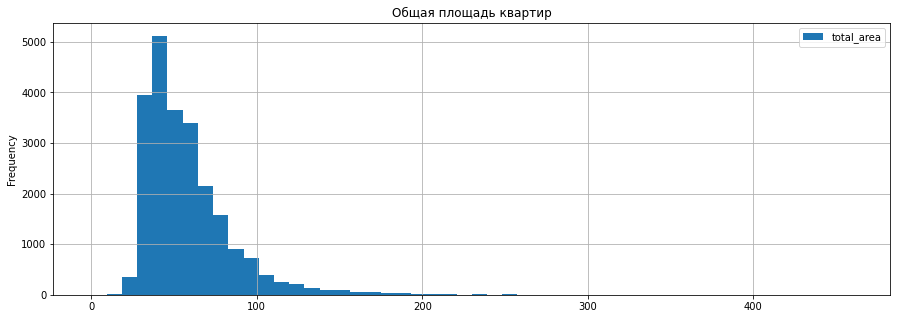

In [81]:
# Построим гистограмму площади квартир
data['total_area'].plot(
    kind='hist', 
    y='total_area', 
    title='Общая площадь квартир', 
    range=(0, 460), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

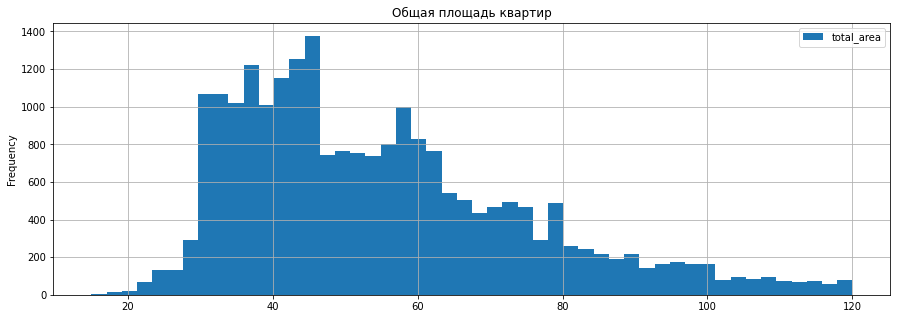

In [82]:
# Еще раз построим гистограмму площади квартир, убрав из гистограммы выбросы свыше 120 м2
data['total_area'].plot(
    kind='hist', 
    y='total_area', 
    title='Общая площадь квартир', 
    range=(15, 120), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

***На основе полученных данных можно отметить, что:***

На первой диаграмме мы увидели, что на графике есть большой хвост с квартирами площадью выше 100-120 м2. Также есть маленький хвост, в который входят квартиры площадью до 27 м2. Поэтому на второй диаграмме я решила немного ограничить диапазон, оставив квартиры площадью до 120 м2. 

Судя по второй (более наглядной) диаграмме можно сказать, что самый частый вид объявлений - это квартиры площадью от 30 м2 до 62 м2. Лидируют квартиры площадью 45 м2 - таких предложений больше всего на рынке. На втором месте с небольшим отставанием - квартиры площадью 37 м2. Медианное значение - 51.5 м2.

In [83]:
# Изучаем следующие параметры объектов: жилая площадь
# Проверим характерные значения в living_area
data['living_area'].describe()

count    21458.000000
mean        33.335279
std         18.391571
min          5.400000
25%         18.500000
50%         30.000000
75%         42.000000
max        279.600000
Name: living_area, dtype: float64

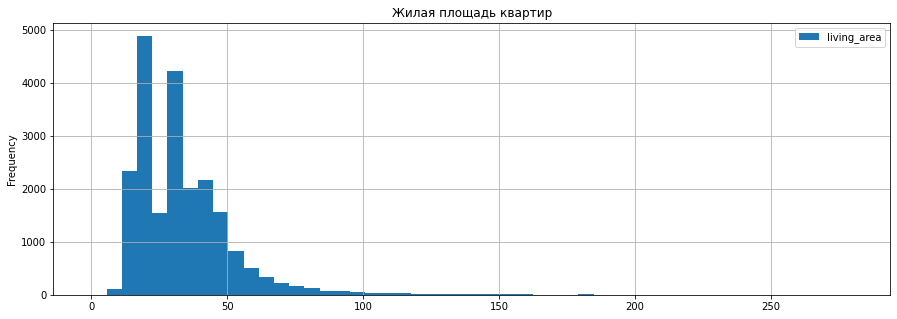

In [84]:
# Построим гистограмму жилой площади
data['living_area'].plot(
    kind='hist', 
    y='living_area', 
    title='Жилая площадь квартир', 
    range=(0, 280), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

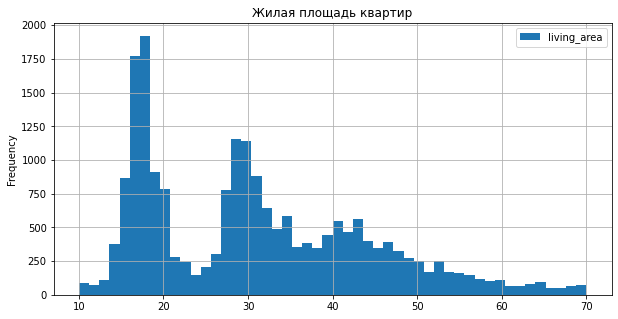

In [85]:
# Еще раз построим гистограмму жилой площади квартир, убрав из гистограммы выбросы свыше 70 м2
data['living_area'].plot(
    kind='hist', 
    y='living_area', 
    title='Жилая площадь квартир', 
    range=(10, 70), 
    bins=50, 
    figsize=(10, 5), 
    grid=True, 
    legend=True
)
plt.show()

***На основе полученных данных можно отметить, что:***

На первой диаграмме мы увидели, что на графике есть большой хвост с квартирами, жилая площадь которых выше 70 м2. Также есть маленький хвост, в который входят квартиры площадью до 13 м2. Поэтому на второй диаграмме я решила немного ограничить диапазон, оставив квартиры с жилой площадью до 70 м2.

Судя по второй (более наглядной) диаграмме можно сказать, что самый частый вид объявлений - это квартиры площадью от 15 до 20 м2 и от 25 до 35 м2. Лидируют квартиры с жилой площадью 18 м2 - таких предложений больше всего на рынке. На втором месте с небольшим отставанием - квартиры с жилой площадью 17 м2. Медианное значение - 30 м2.

In [86]:
# Изучаем следующие параметры объектов: площадь кухни
# Проверим характерные значения в kitchen_area
data['kitchen_area'].describe()

count    23323.000000
mean         9.330093
std          5.764551
min          0.000000
25%          6.300000
50%          8.800000
75%         11.200000
max        100.700000
Name: kitchen_area, dtype: float64

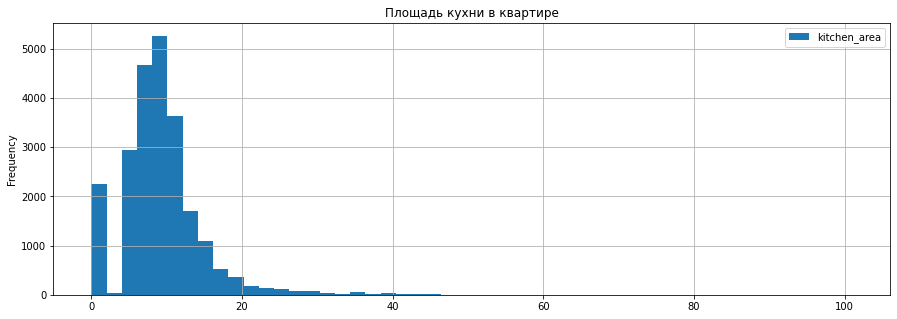

In [87]:
# Построим гистограмму площади кухни
data['kitchen_area'].plot(
    kind='hist', 
    y='kitchen_area', 
    title='Площадь кухни в квартире', 
    range=(0, 101), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

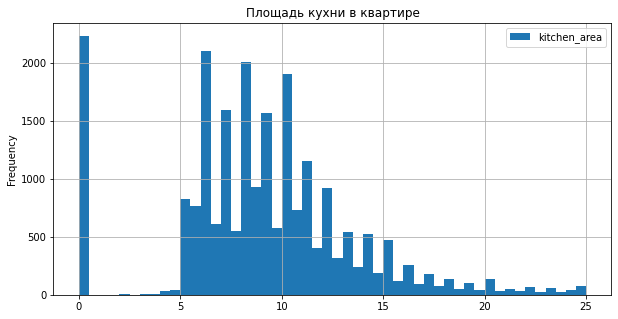

In [88]:
# Еще раз построим гистограмму жилой площади квартир, убрав из гистограммы выбросы свыше 25 м2
data['kitchen_area'].plot(
    kind='hist', 
    y='kitchen_area', 
    title='Площадь кухни в квартире', 
    range=(0, 25), 
    bins=50, 
    figsize=(10, 5), 
    grid=True, 
    legend=True
)
plt.show()

***На основе полученных данных можно отметить, что:***

На первой диаграмме мы увидели, что на графике есть большой хвост с квартирами, кухонная площадь которых выше 25 м2. Также есть квартиры с площадью нулевой площадью кухни. Как мы помним из исследования, это квартиры-студии. На второй диаграмме я решила немного ограничить диапазон, оставив квартиры с кухонной площадью до 25 м2.

Судя по второй (более наглядной) диаграмме можно сказать, что самый частый вид объявлений - это квартиры с кухней от 5 до 12,5 м2. Лидируют квартиры с кухонной площадью 5,5-6 м2 - таких предложений больше всего на рынке. На втором месте с минимальным отставанием - квартиры с кухонной площадью 7,5 м2. На третьем - квартиры с кухонной площадью 10 м2. Медианное значение - 8,8 м2.

In [89]:
# Изучаем следующие параметры объектов: цена объекта
# Проверим характерные значения в last_price
data['last_price'].describe()

count    2.332300e+04
mean     5.730857e+06
std      4.009397e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      2.999900e+07
Name: last_price, dtype: float64

In [90]:
# Разделим все значения в столбце last_price на 1 млн.
data['last_price'] = data['last_price']/1000000
# Проверим характерные значения в last_price
data['last_price'].describe()

count    23323.000000
mean         5.730857
std          4.009397
min          0.430000
25%          3.400000
50%          4.600000
75%          6.650000
max         29.999000
Name: last_price, dtype: float64

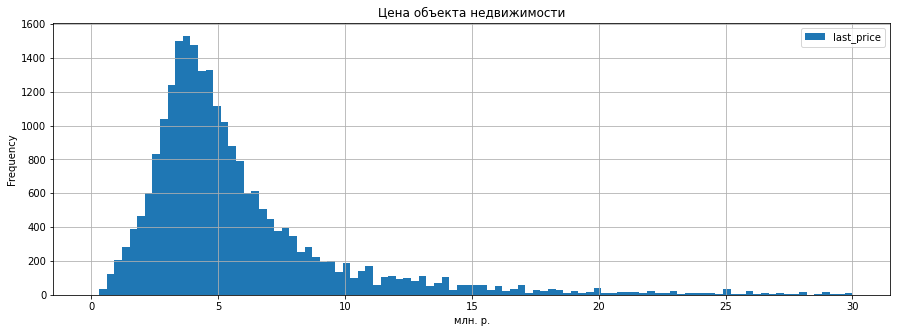

In [91]:
# Построим гистограмму цены объекта недвижимости
data['last_price'].plot(
    kind='hist', 
    y='last_price', 
    title='Цена объекта недвижимости', 
    range=(0, 30), 
    bins=100, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.xlabel('млн. р.')
plt.show()

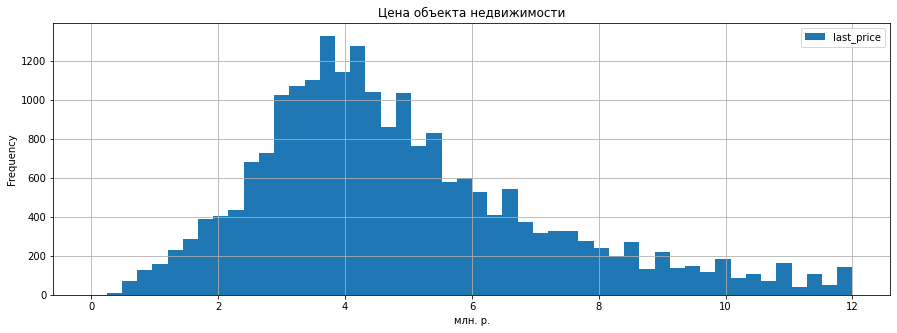

In [92]:
# Еще раз построим гистограмму цены объекта недвижимости, убрав из гистограммы выбросы свыше 12 млн. р.
data['last_price'].plot(
    kind='hist', 
    y='last_price', 
    title='Цена объекта недвижимости', 
    range=(0, 12), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.xlabel('млн. р.')
plt.show()

***На основе полученных данных можно отметить, что:***

На первой диаграмме мы увидели, что на графике есть большой хвост с квартирами, стоимостью выше 12 млн. Также есть небольшой хвост с квартирами, стоимостью 800 000 р. На второй диаграмме я решила немного ограничить диапазон, оставив квартиры стоимостью до 12 млн. р.

Судя по второй (более наглядной) диаграмме можно сказать, что самый частый вид объявлений - это квартиры стоимостью от 3 млн. р. до 5,5 млн. р. Лидируют квартиры стоимостью 3,5-3,8 млн. р. - таких предложений больше всего на рынке. Следующие по популярности - квартиры стоимостью 4,2 млн. р. Медианное значение - 4,6 млн. р. Квартир, стоимостью свыше 9 млн. р. совсем мало.

In [93]:
# Изучаем следующие параметры объектов: количество комнат
# Проверим характерные значения в rooms
data['rooms'].describe()

count    23323.000000
mean         2.047207
std          1.014918
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

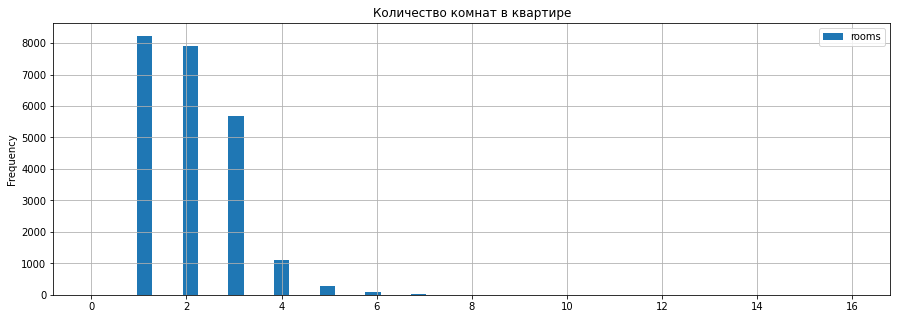

In [94]:
# Построим гистограмму количества комнат в квартире
data['rooms'].plot(
    kind='hist', 
    y='rooms', 
    title='Количество комнат в квартире', 
    range=(0, 16), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

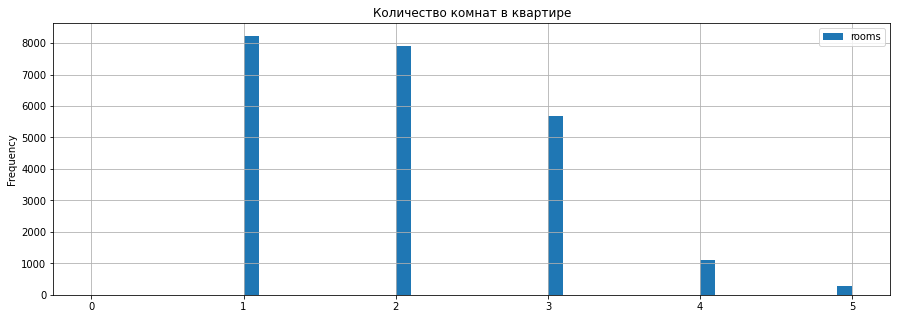

In [95]:
# Еще раз построим гистограмму количества комнат в квартире, убрав из гистограммы выбросы свыше 5 комнат.
data['rooms'].plot(
    kind='hist', 
    y='rooms', 
    title='Количество комнат в квартире', 
    range=(0, 5), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

***На основе полученных данных можно отметить, что:***

На первой диаграмме мы увидели, что на графике есть большой хвост с квартирами, в которых больше 5 комнат. На второй диаграмме я решила  ограничить диапазон, оставив квартиры, в которых до 5 комнат.

Судя по второй (более наглядной) диаграмме можно сказать, что самый частый вид объявлений - это квартиры с 1-3 комнатами. Лидиры - квартиры-однушки (в том числе студии). Следующие по популярности - квартиры с двумя комнатами. А вот квартиры с количеством комнат более 3 ищут гораздо реже. Медианное значение - 2 комнаты.


In [96]:
# Изучаем следующие параметры объектов: высота потолков
# Проверим характерные значения в ceiling_height
data['ceiling_height'].describe()

count    23323.000000
mean         2.691074
std          0.205227
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

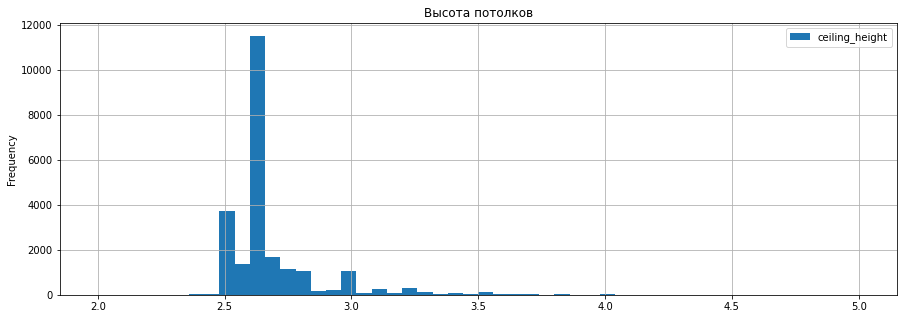

In [97]:
# Построим гистограмму высоты потолков
data['ceiling_height'].plot(
    kind='hist', 
    y='ceiling_height', 
    title='Высота потолков', 
    range=(2, 5), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

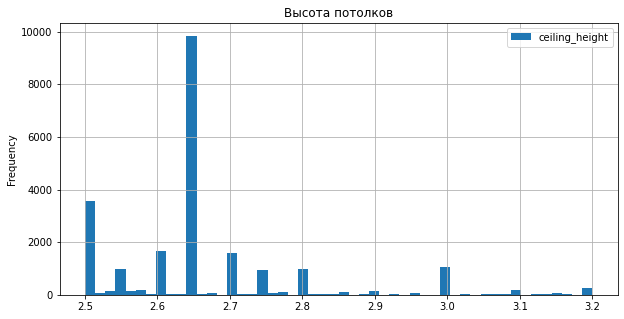

In [98]:
# Еще раз построим гистограмму высоты потолков, убрав из гистограммы выбросы свыше 3,2 м.
data['ceiling_height'].plot(
    kind='hist', 
    y='ceiling_height', 
    title='Высота потолков', 
    range=(2.5, 3.2), 
    bins=50, 
    figsize=(10, 5), 
    grid=True, 
    legend=True
)
plt.show()

***На основе полученных данных можно отметить, что:***

На первой диаграмме мы увидели, что на графике есть большой хвост с квартирами с высотой потолков выше 3,2 м. Также есть небольшой хвост с квартирами, где потолки менее 2,5 м. На второй диаграмме я решила немного ограничить диапазон, оставив квартиры с потолками до 3,2 м.

Судя по второй (более наглядной) диаграмме можно сказать, что самый частый вид объявлений - это квартиры с потолками 2,5-2,7 м. Лидируют квартиры с потолками высотой 2,65 м. - таких предложений больше всего на рынке. Следующие по популярности - квартиры с потолками высотой 2,5 м. Медианное значение - 2,65 м. Квартир с потолками от 3 м. совсем мало. Также мало квартир с потолками в 2,9 м.

In [99]:
# Изучаем следующие параметры объектов: этаж квартиры
# Проверим характерные значения в floor
data['floor'].describe()

count    23323.000000
mean         5.901385
std          4.899037
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

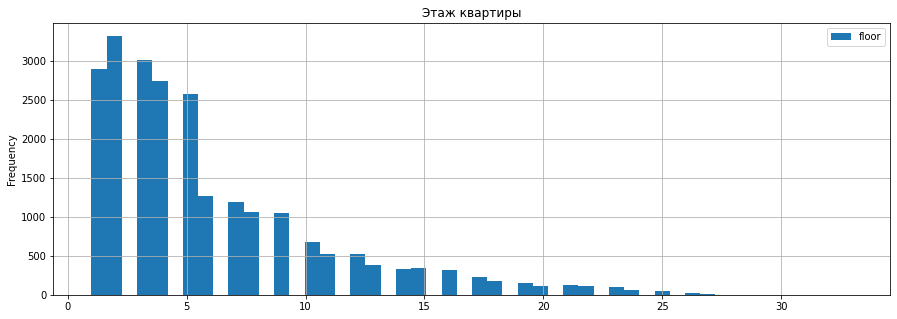

In [100]:
# Построим гистограмму этажей квартир
data['floor'].plot(
    kind='hist', 
    y='floor', 
    title='Этаж квартиры', 
    range=(1, 33), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

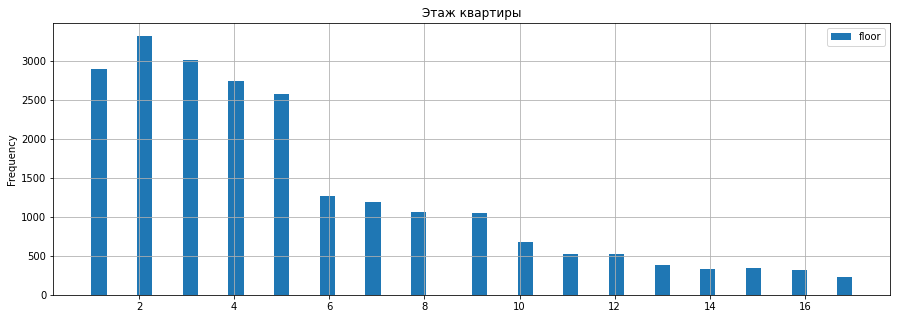

In [101]:
# Еще раз построим гистограмму этажей квартир, убрав из гистограммы выбросы свыше 17 этажа.
data['floor'].plot(
    kind='hist', 
    y='floor', 
    title='Этаж квартиры', 
    range=(1, 17), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

***На основе полученных данных можно отметить, что:***

На первой диаграмме мы увидели, что на графике есть большой хвост с квартирами, которые расположены выше 17 этажа. На второй диаграмме я решила немного ограничить диапазон, оставив квартиры, которые располагаются до 17 этажа.

Судя по второй (более наглядной) диаграмме можно сказать, что самый частый вид объявлений - это квартиры, находящиеся на 1-5 этажах. Лидируют квартиры, расположенные на 2 этажах - таких предложений больше всего на рынке. Следующие по популярности - квартиры, расположенные на 3 этажах. Медианное значение - 4 этаж. Квартир, расположенных, начиная с 6 этажа, с каждым этажом все меньше. 

In [102]:
# Изучаем следующие параметры объектов: тип этажа квартиры («первый», «последний», «другой»)
# Проверим количество объявлений в каждой категории в type_of_floor
data['type_of_floor'].value_counts()

другой       17161
последний     3265
первый        2897
Name: type_of_floor, dtype: int64

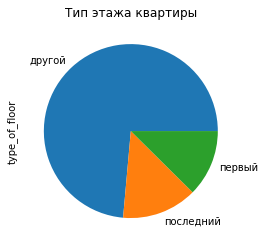

In [103]:
# Построим круговую диаграмму с типами этажа квартиры
data['type_of_floor'].value_counts().plot(
    kind='pie', 
    title='Тип этажа квартиры'
)
plt.show()

***На основе полученных данных можно отметить, что:***

На круговой диаграмме мы увидели, что три четверти квартир расположены на отличных от 1 и последнего этажах. На первом и последнем этаже расположено почти схожее количество квартир.

In [104]:
# Изучаем следующие параметры объектов: общее количество этажей в доме
# Проверим характерные значения в floors_total
data['floors_total'].describe()

count    23323.000000
mean        10.709257
std          6.604900
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

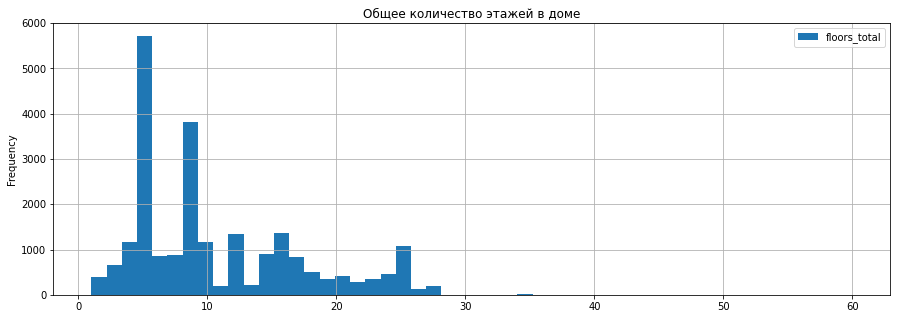

In [105]:
# Построим гистограмму для общего количества этажей в доме
data['floors_total'].plot(
    kind='hist', 
    y='floors_total', 
    title='Общее количество этажей в доме', 
    range=(1, 60), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

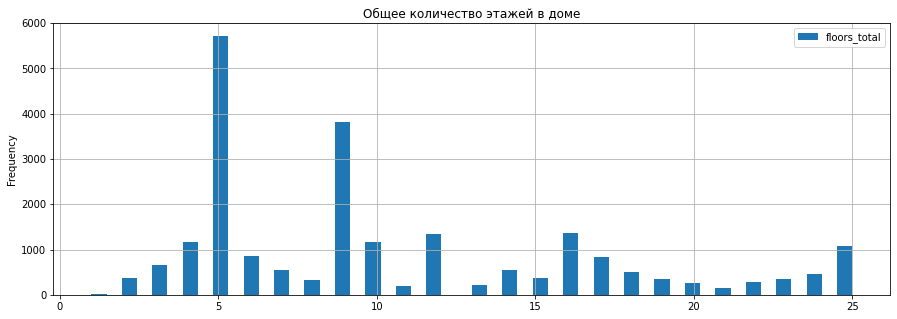

In [106]:
# Еще раз построим гистограмму для общего количества этажей в доме, убрав из гистограммы выбросы свыше 25 этажа.
data['floors_total'].plot(
    kind='hist', 
    y='floors_total', 
    title='Общее количество этажей в доме', 
    range=(1, 25), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

***На основе полученных данных можно отметить, что:***

На первой диаграмме мы увидели, что на графике есть большой хвост с квартирами, расположенными в домах, где больше 25 этажей. На второй диаграмме я решила немного ограничить диапазон, оставив квартиры в домах до 25 этажей.

Судя по второй (более наглядной) диаграмме можно сказать, что самый частый вид объявлений - это квартиры, расположенные в 5, 9, 10, 12, 16-этажных домах. Лидируют квартиры, расположенные в 5-этажках - таких предложений больше всего на рынке. Следующие по популярности - квартиры, расположенные в 9-этажках. Медианное значение - 9 этажей. 

In [107]:
# Изучаем следующие параметры объектов: расстояние до центра города в метрах
# Проверим характерные значения в city_centers_nearest
data['city_centers_nearest'].describe()

count    17821.000000
mean     14355.449975
std       8587.153916
min        208.000000
25%       9567.000000
50%      13217.000000
75%      16383.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

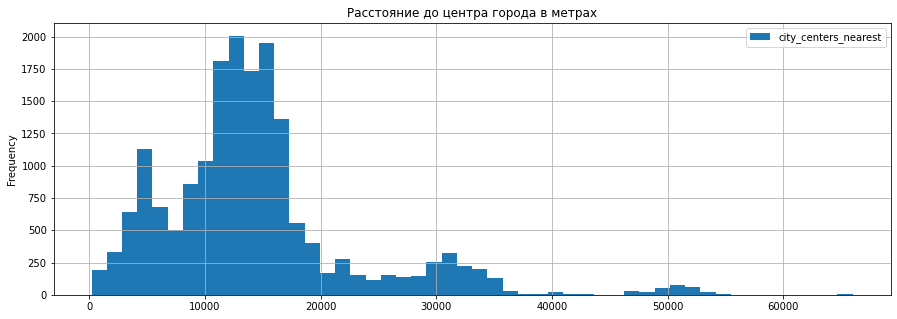

In [108]:
# Построим гистограмму расстояния до центра города в метрах
data['city_centers_nearest'].plot(
    kind='hist', 
    y='city_centers_nearest', 
    title='Расстояние до центра города в метрах', 
    range=(200, 66000), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

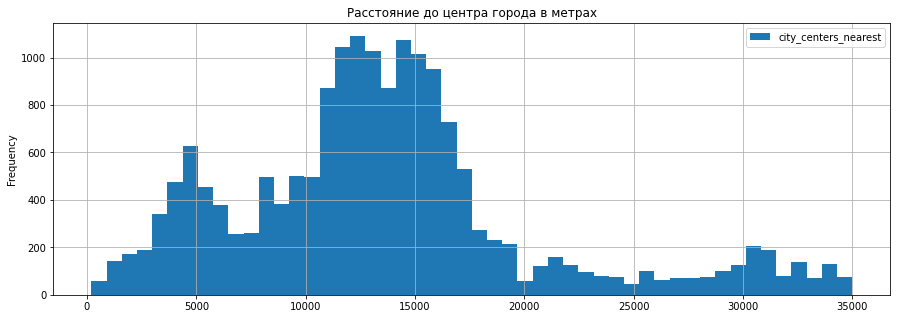

In [109]:
# Еще раз построим гистограмму расстояния до центра города в метрах, убрав из гистограммы выбросы свыше 35000 м.
# Построим гистограмму 
data['city_centers_nearest'].plot(
    kind='hist', 
    y='city_centers_nearest', 
    title='Расстояние до центра города в метрах', 
    range=(200, 35000), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

***На основе полученных данных можно отметить, что:***

На первой диаграмме мы увидели, что на графике есть большой хвост с квартирами, у которых расстояние до центра города свыше 35000 м. На второй диаграмме я решила немного ограничить диапазон, оставив квартиры, находящиеся на расстоянии до 35000 м от центра. 

Судя по второй (более наглядной) диаграмме можно сказать, что самый частый вид объявлений - это квартиры, расположенные в 11000-17000 м. от центра города. Лидируют квартиры, расположенные в 13000 м от центра - таких предложений больше всего на рынке. Следующие по популярности - квартиры, расположенные в 14000 от центра. Медианное значение - 13200 м.

In [110]:
# Изучаем следующие параметры объектов: расстояние до ближайшего аэропорта
# Проверим характерные значения в airports_nearest
data['airports_nearest'].describe()

count    17800.000000
mean     28842.617978
std      12725.319031
min       6450.000000
25%      18488.000000
50%      26798.000000
75%      37412.000000
max      84869.000000
Name: airports_nearest, dtype: float64

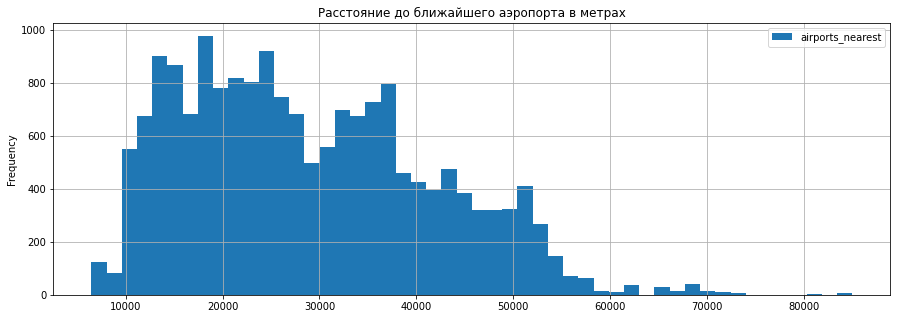

In [111]:
# Построим гистограмму расстояния до ближайшего аэропорта в метрах
data['airports_nearest'].plot(
    kind='hist', 
    y='airports_nearest', 
    title='Расстояние до ближайшего аэропорта в метрах', 
    range=(6450, 85000), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

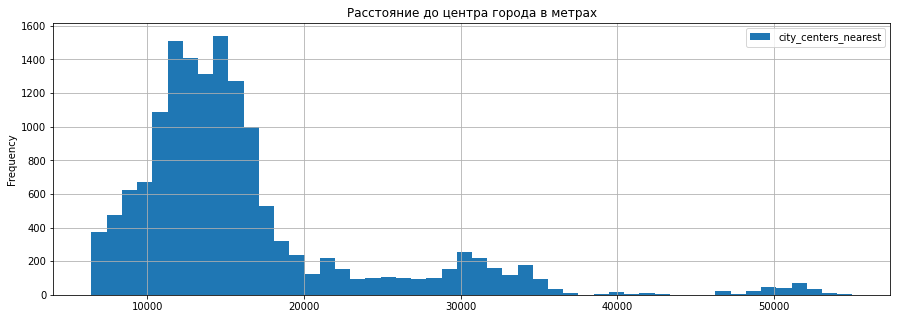

In [112]:
# Еще раз построим гистограмму расстояния до ближайшего аэропорта в метрах, убрав из гистограммы выбросы свыше 55000 м.
data['city_centers_nearest'].plot(
    kind='hist', 
    y='city_centers_nearest', 
    title='Расстояние до центра города в метрах', 
    range=(6450, 55000), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

***На основе полученных данных можно отметить, что:***

На первой диаграмме мы увидели, что на графике есть большой хвост с квартирами, у которых расстояние до ближайшего аэропорта свыше 55000 м. На второй диаграмме я решила немного ограничить диапазон, оставив квартиры, находящиеся на расстоянии до 55000 м от аэропорта.

Судя по второй (более наглядной) диаграмме можно сказать, что самый частый вид объявлений - это квартиры, расположенные в 11000-17000 м. от аэропорта. Лидируют квартиры, расположенные в 15000 м от аэропорта - таких предложений больше всего на рынке. Следующие по популярности - квартиры, расположенные в 12000 м от аэропорта. Медианное значение - 26800 м.

In [113]:
# Изучаем следующие параметры объектов: расстояние до ближайшего парка
# Проверим характерные значения в parks_nearest
data['parks_nearest'].describe()

count    7825.000000
mean      493.692524
std       342.628815
min         1.000000
25%       289.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

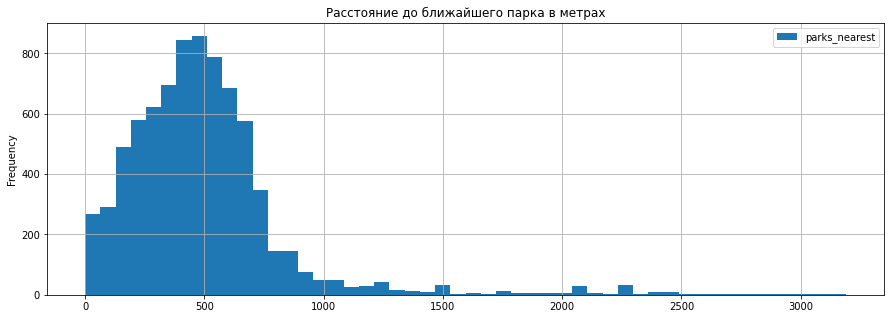

In [114]:
# Построим гистограмму расстояния до ближайшего парка в метрах
data['parks_nearest'].plot(
    kind='hist', 
    y='parks_nearest', 
    title='Расстояние до ближайшего парка в метрах', 
    range=(0, 3190), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

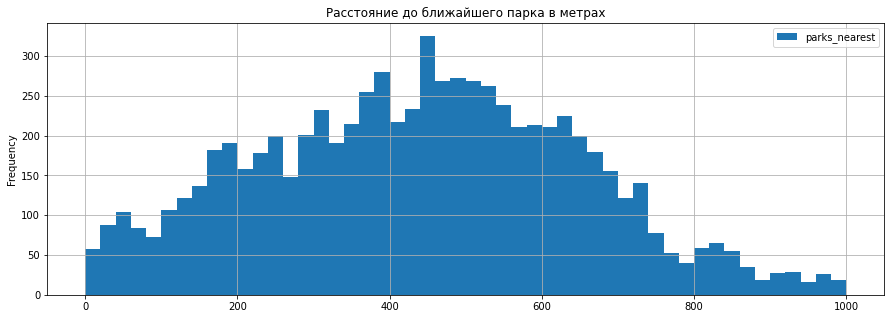

In [115]:
# Еще раз построим гистограмму расстояния до ближайшего парка в метрах, убрав из гистограммы выбросы свыше 1000 м.
data['parks_nearest'].plot(
    kind='hist', 
    y='parks_nearest', 
    title='Расстояние до ближайшего парка в метрах', 
    range=(0, 1000), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

***На основе полученных данных можно отметить, что:***

На первой диаграмме мы увидели, что на графике есть самый большой столбец с квартирами, которые расположены более, чем в 3000 м. от ближайших парков. Также мы увидели большой хвост с квартирами, у которых расстояние до ближайшего парка свыше 1000 м. На второй диаграмме я решила немного ограничить диапазон, оставив квартиры, находящиеся на расстоянии до 1000 м от парка.

Судя по второй (более наглядной) диаграмме можно сказать, что самый частый вид объявлений - это квартиры, расположенные в 380-480 м. от парка (не считая квартир, расположенных далеко от парков, более, чем в 3000 м.). Лидируют квартиры, расположенные в 430 м. от парков - таких предложений больше всего на рынке. Следующие по популярности - квартиры, расположенные в 390-400 м от парка. Медианное значение - 3127 м., так как огромный пласт квартир находится далеко от парков.

In [116]:
# Изучаем следующие параметры объектов: день публикации объявления
# Проверим количество объявлений в каждый день недели в weekday_exposition
data['weekday_exposition'].value_counts()

3    4211
1    4126
4    3942
2    3920
0    3559
5    1901
6    1664
Name: weekday_exposition, dtype: int64

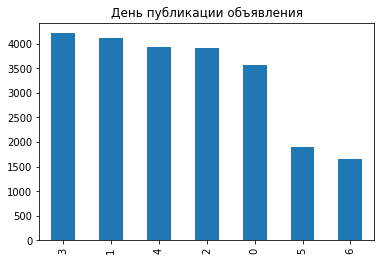

In [117]:
# Построим столбчатую диаграмму дней публикации объявлений
data['weekday_exposition'].value_counts().plot(
    kind='bar',  
    title='День публикации объявления'
)
plt.show()

***На основе полученных данных можно отметить, что:***

На столбчатой диаграмме мы увидели, что самый популярный день недели для публикации объявлений - четверг. Следом за ним идут вторник, пятница и среда. В понедельник объявления публикуют несколько реже. А вот выходные - непопулярные дни для публикаии, особенно воскресенье. 

In [118]:
# Изучаем следующие параметры объектов: месяц публикации объявления
# Проверим количество объявлений в каждый месяц в month_exposition
data['month_exposition'].value_counts()

2     2603
3     2549
4     2349
11    2332
10    2101
9     1954
6     1725
8     1717
7     1665
12    1612
1     1468
5     1248
Name: month_exposition, dtype: int64

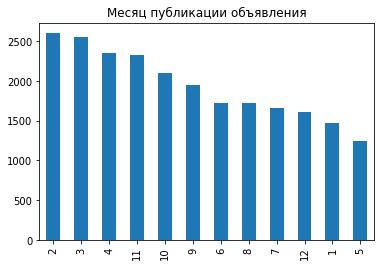

In [119]:
# Построим столбчатую диаграмму месяцев публикации объявлений
data['month_exposition'].value_counts().plot(
    kind='bar',  
    title='Месяц публикации объявления'
)
plt.show()

***На основе полученных данных можно отметить, что:***

На столбчатой диаграмме мы увидели, что самый популярный месяц для публикации объявлений - февраль. Следом за ним с небольшим отставанием идет март, а затем апрель и ноябрь. Видимо, пользователи чаще всего начинают заниматься продажей недвижимости после новогодних праздников и каникул. Меньше всего объявлений было опубликовано в мае. Январь также непопулярный месяц для публикаций. Видимо, из-за большого количество праздничных выходных дней в мае и январе.

***Вывод***

Исходя из анализа различных гистограмм, можно прийти к выводу, что самый популярный вариант недвижимости это:
Квартира площадью 45 м2, с жилой зоной в 18 м2 и кухней в 5,5-6 м2, стоимостью 3,5-3,8 млн. р., однокомнатная, со стандартным потолком 2,65 м., расположенная на 2 этаже в пятиэтажном доме, в 13 км. от центра города и/или в 15 км. от аэропорта, в 430 м. от парка. Самые популярные объявления - опубликованные по четвергам в феврале.

In [120]:
# Посмотрим на среднее и медианное время продажи квартир
data['days_exposition'].describe()

count    20224.000000
mean       179.334850
std        218.297422
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

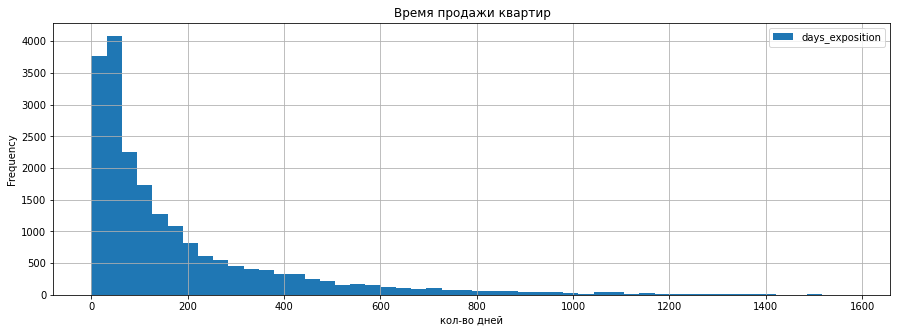

In [121]:
# Построим гистограмму времени продажи квратир
data['days_exposition'].plot(
    kind='hist', 
    y='days_exposition', 
    title='Время продажи квартир', 
    range=(0, 1580), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.xlabel('кол-во дней')
plt.show()

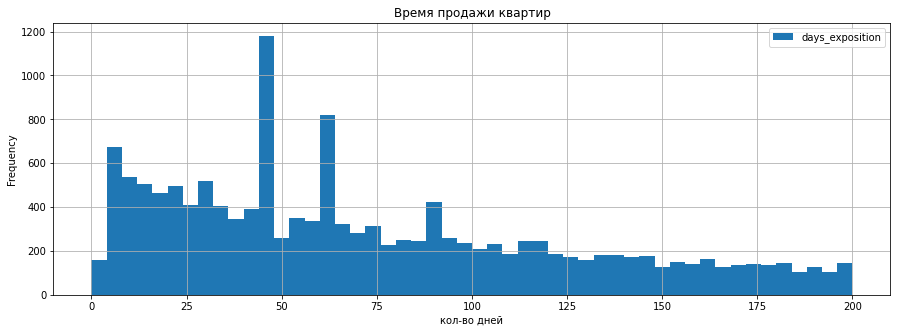

In [122]:
# Еще раз построим гистограмму времени продажи квратир, убрав из гистограммы выбросы свыше 200 дней.
data['days_exposition'].plot(
    kind='hist', 
    y='days_exposition', 
    title='Время продажи квартир', 
    range=(0, 200), 
    bins=50, 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.xlabel('кол-во дней')
plt.show()

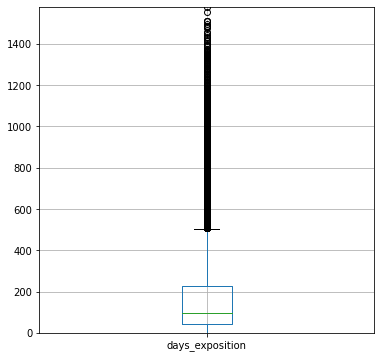

In [123]:
# Построим диаграмму размаха, чтобы посмотреть на "ящик", "усы" и выбросы
data.boxplot(column='days_exposition', figsize=(6, 6))
plt.ylim(0, 1580)
plt.show()

***На основе полученных данных можно отметить, что:***

На первой диаграмме мы увидели, что на графике есть большой хвост с квартирами, которые продавались дольше 200 дней и вплоть до 1580 дней. На второй диаграмме я решила немного ограничить диапазон, оставив квартиры, которые продавались менее 200 дней.

Судя по второй (более наглядной) диаграмме можно сказать, что самый частый срок размещения на сайте объявлений - это 45-65 дней. Лидируют квартиры, объявления по продажи которых размещались в течение 45 дней. Следующие по статистике - квартиры, объявления по продажи которых размещались в течение 60 дней.

Среднее время - 179 дней. Медианное время - 95 дней.

**На диаграмме размаха мы видим, что:**

-"Ящиком", то есть средним показателем продажи квартиры является период в 45-220 дней. 

-"Усы" - период от 0 до 45 дней (что является быстрой продажей) и от 220 до 500 дней (что является долгой продажей).

-Значения свыше 500 дней - это выбросы.

Однако стоит отметить, что в продаже квартир и размещении на сайте могут быть свои нюансы, например, пользователь мог не сразу снять объявление с сайта после продажи, или, договорившись с покупателем и начав осуществление сделки, пользователь мог быстрее снять объявление, хотя по факту квартира продалась спустя несколько недель проверки документов, например. Также некоторые квартиры могут годами висеть на сайте по разным причинам (например, квартира слишком дорогая или слишком большая - для таких вариантов покупатели находятся дольше, чем обычно). Также странно, что некоторые объявления были сняты через несколько дней после объявления - может быть пользователь просто хотел посмотреть спрос на свою квартиру и т.д.).

In [124]:
# Построим сводную таблицу зависимости цены от общей площади квартиры
price_and_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'median'])
price_and_total_area

mean     median
           last_price last_price
total_area                      
12.00        2.400000   2.400000
13.00        2.350000   1.850000
13.20        1.686000   1.686000
14.00        1.190000   1.190000
15.00        1.725000   1.725000
15.50        2.450000   2.450000
16.00        2.100000   2.100000
17.00        1.700000   1.700000
17.20        2.050000   2.050000
17.60        3.400000   3.400000
17.78        1.737000   1.737000
18.00        1.872000   1.900000
18.40        2.200000   2.200000
18.50        1.500000   1.500000
18.80        1.350000   1.350000
18.90        1.900000   1.900000
19.00        2.220000   2.220000
19.50        0.945750   0.945750
20.00        2.150625   2.085000
20.10        2.150000   2.150000
20.30        2.740000   2.740000
20.50        2.085000   2.085000
20.60        2.000000   2.000000
20.67        1.855625   1.855625
20.80        1.900000   1.900000
21.00        2.576667   2.730000
21.10        1.750000   1.750000
21.30        2.100000   2.100000
21.40        2.295000   1.750000
21.57        2.000000   2.000000
21.60        1.800000   1.800000
21.70        1.740000   1.740000
21.80        2.150000   2.150000
21.89        1.900000   1.900000
21.90        2.610000   2.610000
22.00        2.189765   2.200000
22.20        2.170000   2.170000
22.23        2.850000   2.850000
22.30        2.500000   2.500000
22.40        1.600000   1.600000
22.50        1.678945   1.725000
22.70        2.692500   2.610000
23.00        2.427632   2.400000
23.06        2.550000   2.550000
23.17        1.995000   1.995000
23.29        2.920000   2.920000
23.30        2.779800   2.650000
23.39        2.350000   2.350000
23.40        2.843000   2.980000
23.50        2.753333   2.650000
23.55        2.199000   2.199000
23.60        2.650000   2.650000
23.69        2.400000   2.400000
23.70        1.966667   2.000000
23.80        3.600000   3.600000
23.98        1.810000   1.810000
24.00        2.648615   2.600000
24.05        2.450000   2.450000
24.10        2.500000   2.500000
24.20        2.691667   2.475000
24.26        2.250000   2.250000
24.30        3.190000   3.190000
24.40        2.549000   2.600000
24.42        1.950000   1.950000
24.50        2.767500   2.615000
24.60        3.725000   3.725000
24.62        2.385000   2.385000
24.64        3.390000   3.390000
24.67        2.903659   2.903659
24.70        2.782500   2.782500
24.75        2.250000   2.250000
24.80        2.670000   2.350000
24.90        3.335000   3.335000
25.00        3.364073   2.980000
25.07        3.250000   3.250000
25.15        2.925000   2.925000
25.20        2.850000   2.850000
25.27        2.950000   2.950000
25.30        3.050000   3.050000
25.33        2.170000   2.170000
25.36        2.430000   2.430000
25.40        3.300000   3.300000
25.41        2.295000   2.295000
25.48        2.690000   2.690000
25.50        2.960000   2.920000
25.53        2.100000   2.100000
25.55        2.440000   2.440000
25.60        2.746667   2.690000
25.63        1.880000   1.880000
25.70        2.540000   2.700000
25.80        2.550000   2.550000
25.90        2.075000   2.075000
26.00        2.807857   2.850000
26.05        2.650000   2.650000
26.09        2.565000   2.565000
26.10        2.896667   2.600000
26.18        2.655000   2.655000
26.20        3.199000   3.199000
26.23        2.580000   2.580000
26.40        2.696667   3.670000
26.45        2.300000   2.300000
26.49        3.670000   3.670000
26.50        2.650000   2.650000
26.60        3.485000   3.485000
26.69        2.700000   2.700000
26.70        2.400000   2.400000
26.80        3.495000   3.495000
26.90        2.600000   2.600000
27.00        2.938971   2.995000
27.10        3.300000   3.500000
27.11        2.480000   2.480000
27.20        3.040000   3.040000
27.30        2.973125   3.122500
27.32        1.315000   1.315000
27.36        2.900000   2.900000
27.40        2.783333   2.200000
27.50        3.850000   3.850000
27.55        2.877000   2.877000
27.56        2.952500   

In [125]:
# Добавим расчет корреляции для цены и общей площади квартиры
print(data['total_area'].corr(data['last_price']))

0.7887089539640123


***Корреляция составляет 0,78 - это достаточно тесная взаимосвязь!***

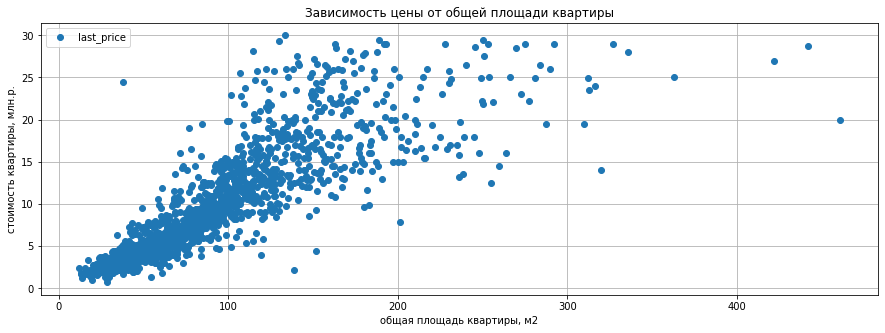

In [126]:
# Построим график зависимости цены от общей площади квартиры
price_and_total_area.plot(
    y='median', 
    style='o',
    title='Зависимость цены от общей площади квартиры', 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.xlabel('общая площадь квартиры, м2')
plt.ylabel('стоимость квартиры, млн.р.')
plt.show()

***На основе полученных данных можно отметить, что:***

На графике мы видим прямую зависимость стоимости квартиры от ее общей площади, что логично. Чем больше метраж, тем выше цена. Конечно, есть единичные выбивающиеся значения, где за маленькую квартиру поставили довольно высокую цену или, где большая по площади квартира стоит столько же, сколько и однокомнатные. Квартир стоимостью до 17 млн. р. и площадью до 130 м2 больше всего.
**Расчет корреляции подтверждает эту взаимосвязь.**

In [127]:
# Построим сводную таблицу зависимости цены от жилой площади квартиры
price_and_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'median'])
price_and_living_area

mean     median
            last_price last_price
living_area                      
5.400000      6.100000   6.100000
6.000000      3.799000   3.799000
6.500000      4.050000   4.050000
8.000000      6.850000   6.850000
8.300000      4.000000   4.000000
8.400000      4.200000   4.200000
8.500000      4.100000   4.100000
8.900000      5.300000   5.300000
9.000000      4.926667   4.600000
9.100000      3.490304   3.490304
9.800000      5.300000   5.300000
10.000000     3.484630   3.216089
10.080000     3.250000   3.250000
10.300000     6.050000   6.050000
10.400000     3.941667   3.500000
10.500000     6.031600   5.500000
10.520000     3.797250   3.797250
10.550000     2.000000   2.000000
10.600000     4.760000   4.760000
10.700000     5.205068   5.205068
10.760000     4.310000   4.310000
10.800000     5.500000   5.500000
10.900000     2.750000   2.750000
10.930000     1.900000   1.900000
10.940000     1.550000   1.550000
11.000000     3.366651   3.220176
11.100000     3.590000   3.590000
11.150000     3.725000   3.725000
11.200000     4.225000   4.225000
11.300000     3.340000   3.250000
11.380000     3.331500   3.331500
11.400000     4.700000   3.125000
11.470000     4.900000   4.900000
11.500000     3.040000   2.800000
11.600000     3.995000   3.995000
11.700000     3.683333   3.900000
11.790000     3.450000   3.450000
11.880000     2.583900   2.583900
11.900000     3.400000   3.400000
11.990000     1.961100   1.961100
12.000000     4.056189   3.550000
12.080000     5.930000   5.930000
12.100000     3.550000   3.500000
12.180000     3.390000   3.390000
12.200000     2.833333   3.250000
12.280000     3.300000   3.300000
12.300000     4.316667   5.600000
12.500000     3.234444   2.980000
12.600000     3.725000   3.725000
12.700000     4.390250   4.275000
12.710000     3.758556   3.758556
12.790000     2.575000   2.575000
12.800000     4.145000   4.145000
12.810000     1.690715   1.690715
12.900000     3.500000   3.500000
13.000000     3.601088   3.300000
13.050000     3.200000   3.200000
13.090000     3.150000   3.150000
13.100000     3.707143   3.790000
13.150000     3.110000   3.110000
13.200000     2.800000   2.800000
13.270000     3.720000   3.720000
13.300000     4.940000   3.775000
13.320000     3.095000   3.095000
13.340000     2.746000   2.746000
13.370000     2.820000   2.820000
13.400000     3.480000   3.150000
13.460000     3.680000   3.680000
13.500000     3.137125   2.775000
13.540000     3.360596   3.360596
13.560000     2.800000   2.800000
13.590000     6.290000   6.290000
13.600000     3.183333   3.175000
13.620000     6.329970   6.329970
13.660000     3.280000   3.280000
13.700000     3.989701   3.200000
13.730000     1.718857   1.718857
13.760000     3.450000   3.450000
13.790000     7.143060   7.143060
13.800000     3.083333   2.950000
13.820000     2.106799   2.106799
13.890000     3.830000   3.830000
13.900000     3.927125   3.990000
13.920000     4.195000   4.195000
14.000000     3.640163   3.490000
14.010000     4.650000   4.650000
14.020000     3.957500   3.957500
14.030000     3.100000   3.100000
14.060000     5.500000   5.500000
14.080000     3.730000   3.730000
14.100000     4.103261   3.700000
14.110000     4.100000   4.100000
14.160000     2.895000   2.895000
14.170000     3.000000   3.000000
14.190000     3.200000   3.200000
14.200000     3.663000   3.615000
14.220000     4.500000   4.500000
14.230000     2.440000   2.440000
14.250000     2.650000   2.650000
14.280000     2.703000   2.703000
14.300000     3.718818   3.605000
14.310000     3.940000   3.940000
14.350000     4.100000   4.100000
14.370000     2.522500   2.600000
14.380000     3.581308   3.585000
14.390000     2.098800   2.098800
14.400000     3.918839   3.400000
14.410000     3.280000   3.280000
14.450000     2.770000   2.770000
14.460000     2.650000   2.650000
14.470000     3.999000   3.999000
14.500000     3.765466   3.775000
14.510000     3.100000   3.100000
14.550000     2.356000   2.356000
14.560000     3.355000   3.355000
14.570

In [128]:
# Добавим расчет корреляции для цены и жилой площади квартиры
print(data['living_area'].corr(data['last_price']))

0.6906822522751023


***Корреляция составляет 0,69 - это указывает на то, что определенная взаимосвязь присутствует!***

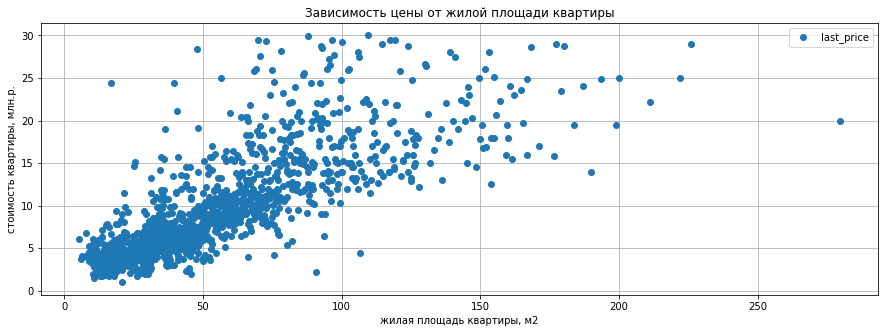

In [129]:
# Построим график зависимости цены от жилой площади
price_and_living_area.plot(
    y='median', 
    style='o',
    title='Зависимость цены от жилой площади квартиры', 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.xlabel('жилая площадь квартиры, м2')
plt.ylabel('стоимость квартиры, млн.р.')
plt.show()

***На основе полученных данных можно отметить, что:***

На графике мы видим прямую зависимость стоимости квартиры от ее жилой площади, что логично. Чем больше метраж жилой площади, тем выше цена. Конечно, есть единичные выбивающиеся значения, где за маленькую жилую площадь поставили довольно высокую цену или, где большая по жилой площади квартира стоит столько же, сколько и однокомнатные. Квартир стоимостью до 17 млн. р. и жилой площадью до 75 м2 больше всего.
**Расчет корреляции подтверждает эту взаимосвязь.**

In [130]:
# Построим сводную таблицу зависимости цены от площади кухни
price_and_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'median'])
price_and_kitchen_area

mean     median
             last_price last_price
kitchen_area                      
0.00           5.285198   4.000000
1.30           4.250000   4.250000
2.00           2.821429   2.720000
2.30           2.940000   2.940000
2.40           2.200000   2.200000
2.89           5.967734   5.967734
3.00           2.735714   3.180000
3.20           6.000000   6.000000
3.30           3.900000   3.900000
3.40           3.700000   3.700000
3.50           4.431250   4.275000
3.70          14.948000  14.948000
3.80           2.663333   2.690000
4.00           3.334760   2.850000
4.10           3.336667   3.660000
4.20           2.762667   2.888000
4.30           2.400000   2.400000
4.40           1.800000   1.800000
4.50           2.980000   2.650000
4.60           2.252500   2.275000
4.70           2.525000   2.770000
4.80           3.381818   3.100000
4.90           2.968333   2.795000
5.00           3.377084   3.180000
5.04           3.900000   3.900000
5.06           3.400000   3.400000
5.10           3.484016   3.600000
5.14           1.800000   1.800000
5.20           3.403686   3.450000
5.21           3.800000   3.800000
5.23           3.450000   3.450000
5.25           5.100000   5.100000
5.28           3.300000   3.300000
5.29           2.590000   2.590000
5.30           3.389259   3.400000
5.31           2.000000   2.000000
5.33           2.800000   2.800000
5.35           3.400000   3.400000
5.40           3.023191   3.040000
5.42           4.990000   4.990000
5.44           6.200000   6.200000
5.47           4.050000   4.050000
5.49           3.200000   3.200000
5.50           3.169168   3.100000
5.53           3.330000   3.330000
5.59           3.485000   3.485000
5.60           3.261790   3.200000
5.61           3.500000   3.500000
5.62           3.100000   3.100000
5.64           4.200000   4.200000
5.65           4.000000   4.000000
5.68           3.675000   3.675000
5.70           3.323926   3.150000
5.74           3.280000   3.280000
5.75           3.630000   3.630000
5.78           4.200000   4.200000
5.80           3.363256   3.200000
5.82           3.100000   3.100000
5.85           3.790000   3.790000
5.86           6.500000   6.500000
5.90           3.752479   3.875000
5.91           1.300000   1.300000
6.00           3.342867   3.300000
6.02           4.500000   4.500000
6.03           4.100000   4.100000
6.10           4.074027   4.050000
6.16           1.961100   1.961100
6.19           4.950000   4.950000
6.20           4.086440   4.250000
6.22           1.720000   1.720000
6.23           3.825000   3.825000
6.24           2.850000   2.850000
6.25           4.225000   4.225000
6.26           2.583900   2.583900
6.27           5.000000   5.000000
6.28           4.700000   4.700000
6.30           4.107943   4.000000
6.31           3.590000   3.590000
6.33           4.175000   4.175000
6.35           4.600000   4.600000
6.36           5.800000   5.800000
6.37           2.583900   2.583900
6.40           3.950768   3.990000
6.47           3.800000   3.800000
6.50           3.802176   3.682500
6.55           2.774500   2.774500
6.58           4.725000   4.725000
6.60           3.934571   3.750000
6.61           3.200000   3.200000
6.62           3.600000   3.600000
6.65           7.750000   7.750000
6.70           4.195857   4.150000
6.72           4.125000   4.125000
6.73           1.718857   1.718857
6.76           5.445000   5.445000
6.77           4.630000   4.630000
6.80           4.373723   4.050000
6.82           6.300000   6.300000
6.83           5.240000   5.240000
6.84           3.600000   3.600000
6.86           4.600000   4.600000
6.90           4.370575   4.300000
6.91           5.900000   5.900000
6.93           4.499000   4.499000
6.95           1.950000   1.950000
7.00           4.164473   4.000000
7.02           4.700000   4.700000
7.03           3.550000   3.550000
7.06           7.400000   7.400000
7.09           4.800000   4.800000
7.10           4.377475   4.190000
7.12           6.599000   6.5

In [131]:
# Добавим расчет корреляции для цены и площади кухни
print(data['kitchen_area'].corr(data['last_price']))

0.5042886721824598


***Корреляция составляет 0,5 - это указывает на то, что взаимосвязь, конечно, присутствует, но не слишком ярковыраженная***

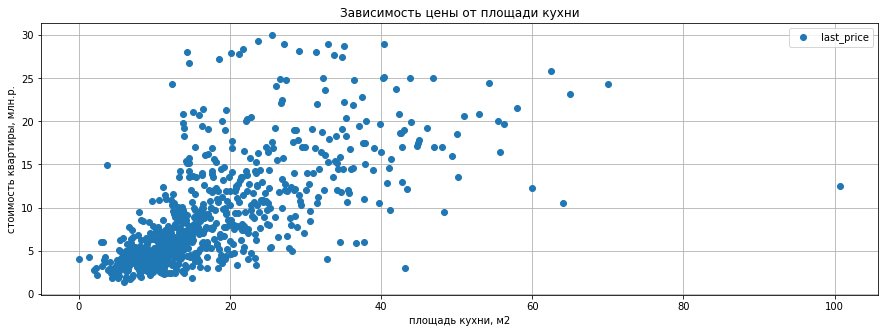

In [132]:
# Построим график зависимости цены от площади кухни
price_and_kitchen_area.plot(
    y='median', 
    style='o',
    title='Зависимость цены от площади кухни', 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.xlabel('площадь кухни, м2')
plt.ylabel('стоимость квартиры, млн.р.')
plt.show()

***На основе полученных данных можно отметить, что:***

На графике мы видим зависимость стоимости квартиры от площади ее кухни. Чем больше метраж кухни, тем выше цена. Однако на данном графике мы видим более плавный рост, чем на предыдущих графиках. И, конечно, есть единичные выбивающиеся значения, например, где за маленькую кухонную площадь поставили довольно высокую цену. Квартир стоимостью до 15 млн. р. и кухонной площадью до 20 м2 больше всего. 
**Расчет корреляции показывает наличие взаимосвязи, но не столь ярковыраженной.**

In [133]:
# Построим сводную таблицу зависимости цены от количества комнат
price_and_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'median'])
price_and_rooms

mean     median
      last_price last_price
rooms                      
1       3.792221     3.5840
2       5.453750     4.7500
3       7.388463     6.1000
4      10.342075     8.7000
5      13.436499    12.5000
6      16.074353    15.9450
7      19.219167    17.9000
8      18.927143    18.0000
9      22.541667    22.8750
10     19.250000    19.2500
11     17.500000    17.5000
14     26.829500    26.8295
16     28.500000    28.5000

In [134]:
# Добавим расчет корреляции для цены и количества комнат
print(data['rooms'].corr(data['last_price']))

0.5233730527830623


***Корреляция составляет 0,52 - это указывает на то, что взаимосвязь, конечно, присутствует, но не слишком ярковыраженная***

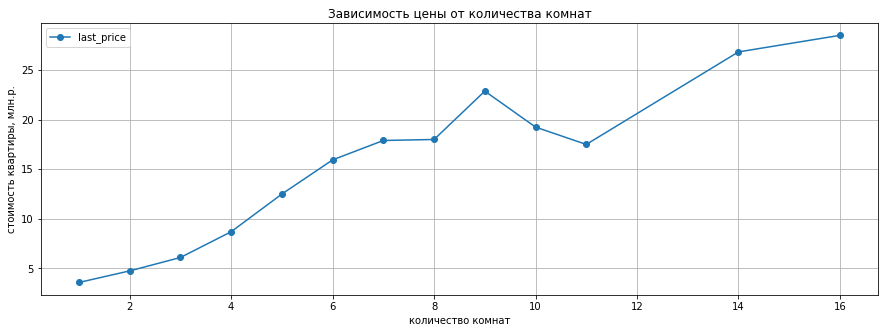

In [135]:
# Построим график зависимости цены от количества комнат
price_and_rooms.plot(
    y='median', 
    style='o-',
    title='Зависимость цены от количества комнат', 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.xlabel('количество комнат')
plt.ylabel('стоимость квартиры, млн.р.')
plt.show()

***На основе полученных данных можно отметить, что:***

На графике мы видим зависимость стоимости квартиры от количества комнат в ней. График плавно растет вверх. Чем больше комнат, тем выше цена, что логично. Однако также мы видим, что график растет для квартир, где 9 комнат, а потом происходит небольшое понижение в цене для квартир с 10,11 комнатами. По моему мнению, это может быть связано или с тем, что некоторые владельцы 9-комнатных кватир, например, завысили цены на свои квартиры, или владельцы 10- и 11-комнатных квартир снизили цены, чтобы немного поднять спрос.
**Расчет корреляции показывает наличие взаимосвязи, но не столь ярковыраженной.**

In [136]:
# Построим сводную таблицу зависимости цены от этажа, на котором расположена квартира (первый, последний, другой)
price_and_type_of_floor = data.pivot_table(index = 'type_of_floor', values = 'last_price', aggfunc = ['mean', 'median'])
price_and_type_of_floor

mean     median
              last_price last_price
type_of_floor                      
другой          5.962079       4.80
первый          4.546558       3.90
последний       5.566362       4.25

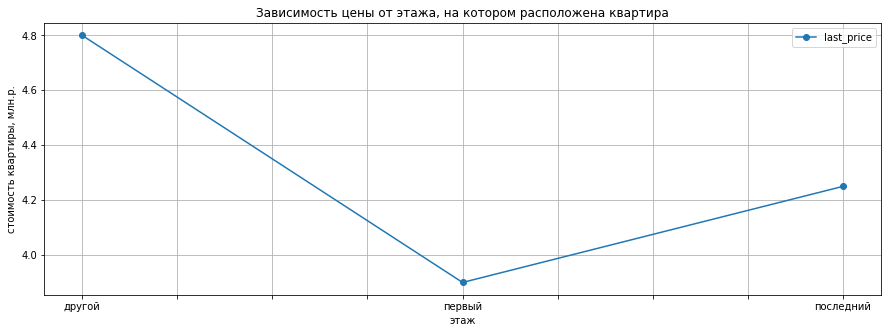

In [137]:
# Построим график зависимости цены от этажа, на котором расположена квартира (первый, последний, другой)
price_and_type_of_floor.plot(
    y='median', 
    style='o-',
    title='Зависимость цены от этажа, на котором расположена квартира', 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.xlabel('этаж')
plt.ylabel('стоимость квартиры, млн.р.')
plt.show()

***На основе полученных данных можно отметить, что:***

На графике мы видим, что стоимость квартир на первых этажах самая низкая. Выше - стоимость на поcледних этажах. И самая высокая стоимость на этажах, отличных от первого и последнего. 

In [138]:
# Построим сводную таблицу зависимости цены от даты размещения (день недели)
price_and_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'median'])
price_and_weekday_exposition

mean     median
                   last_price last_price
weekday_exposition                      
0                    5.773232   4.600000
1                    5.744851   4.700000
2                    5.860986   4.654205
3                    5.858714   4.600000
4                    5.636333   4.540000
5                    5.490808   4.500000
6                    5.473576   4.500000

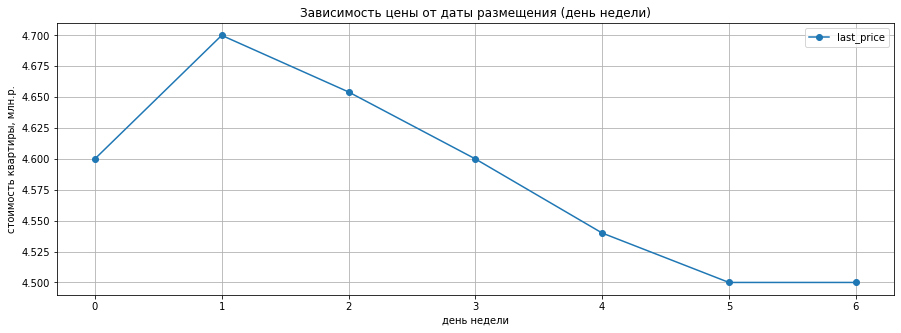

In [139]:
# Построим график зависимости цены от даты размещения (день недели)
price_and_weekday_exposition.plot(
    y='median', 
    style='o-',
    title='Зависимость цены от даты размещения (день недели)', 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.xlabel('день недели')
plt.ylabel('стоимость квартиры, млн.р.')
plt.show()

***На основе полученных данных можно отметить, что:***

На графике мы видим, что самые высокие по стоимости квартиры размещаются на сайте по вторникам. А к выходным стоимость снижается и в выходные она совсем низкая. Я думаю, что это может быть связано с тем, что пользователи размещают гораздо меньше объявлений в выходные, чем в другие дни, ведь, возможно, в эти дни пользователям хочется отдыхать от рабочей недели. А вот ко вторнику их активность снова возрастает.

In [140]:
# Построим сводную таблицу зависимости цены от даты размещения (месяц)
price_and_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'median'])
price_and_month_exposition

mean     median
                 last_price last_price
month_exposition                      
1                  5.828501     4.5995
2                  5.724020     4.6000
3                  5.660065     4.6000
4                  5.825493     4.7800
5                  5.640733     4.5000
6                  5.480961     4.3700
7                  5.763890     4.6000
8                  5.677560     4.5500
9                  5.850520     4.6500
10                 5.652541     4.5500
11                 5.818038     4.6500
12                 5.817753     4.6410

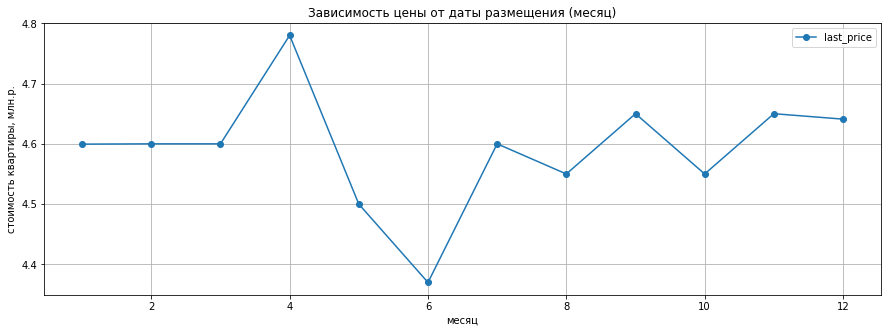

In [141]:
# Построим график зависимости цены от даты размещения (месяц)
price_and_month_exposition.plot(
    y='median', 
    style='o-',
    title='Зависимость цены от даты размещения (месяц)', 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.xlabel('месяц')
plt.ylabel('стоимость квартиры, млн.р.')
plt.show()

***На основе полученных данных можно отметить, что:***

На графике мы видим, что самые высокие по стоимости квартиры размещаются на сайте в апреле. В мае-июне стоимость размещенных квартир снижается. И до зимы стоимость то растет, то снижается. Я думаю, что это может быть связано с сезонность в сфере продажи недвижимости. В мае много праздничных дней, и в мае-июне хочется больше времени проводить на свежем воздухе и отдыхать, поэтому пользователи размещают меньше объявлений на сайте. Всплеск в апреле может быть связан с тем, что в этот весенних месяц многие начинают размещать объявления, понимая, что к лету спрос может упасть, и у них пока есть возможность быстрой продажи квартиры, и лучше разместить в апреле, чем ждать до конца лета-осени.

In [142]:
# Построим сводную таблицу зависимости цены от даты размещения (год)
price_and_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'median'])
price_and_year_exposition

mean     median
                last_price last_price
year_exposition                      
2014              9.515592    7.38828
2015              6.707741    5.20000
2016              5.722161    4.50000
2017              5.653856    4.50000
2018              5.520333    4.53000
2019              6.022068    5.00000

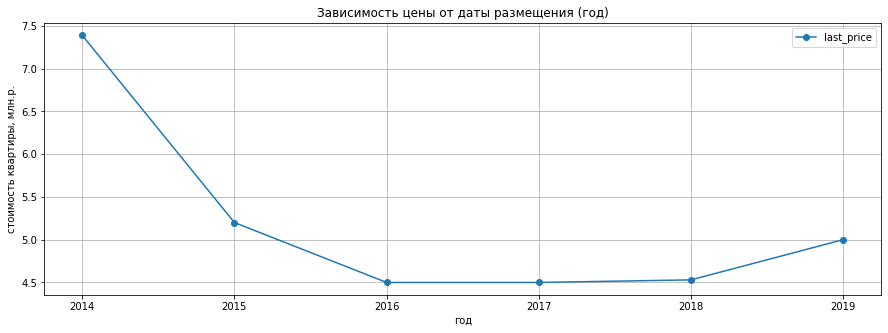

In [143]:
# Построим график зависимости цены от даты размещения (год)
price_and_year_exposition.plot(
    y='median', 
    style='o-',
    title='Зависимость цены от даты размещения (год)', 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.xlabel('год')
plt.ylabel('стоимость квартиры, млн.р.')
plt.show()

***На основе полученных данных можно отметить, что:***

На графике мы сразу же видим, что, начиная с 2015 года рынок недвижимости начал просядать, основная просадка длилась с 2016 до 2018 года. После чего стоимость недвижимости снова начала расти. Стоимость квартир, размещенных в 2014 году была выше. Думаю, просадка была связана с кризисными моментами среди населения, из-за чего спрос на недвижимость упал. А после 2018 года спрос снова стал расти.

In [144]:
# Снова умножим last_price на млн.
data['last_price'] = data['last_price']*1000000
data['last_price'].astype(int)
# Построим сводную таблицу зависимости цены от даты размещения (день недели, месяц, год)
price_and_pivot_table = data.pivot_table(index = 'last_price', values = ['weekday_exposition', 'month_exposition', 'year_exposition'], aggfunc=('median'))
price_and_pivot_table

month_exposition  weekday_exposition  year_exposition
last_price                                                       
430000.0                 5.0                 0.5           2018.5
440000.0                 7.0                 1.0           2018.0
450000.0                 7.0                 2.5           2018.0
470000.0                 2.0                 6.0           2018.0
480000.0                 1.0                 6.0           2019.0
490000.0                 8.5                 1.5           2016.5
500000.0                 3.0                 2.0           2018.0
520000.0                 9.0                 4.0           2017.0
530000.0                 2.0                 2.0           2019.0
550000.0                 3.5                 3.0           2018.0
560000.0                 8.0                 5.0           2018.0
565000.0                 9.0                 3.0           2017.0
580000.0                11.0                 2.0           2016.0
585000.0                 1.0                 2.0           2018.0
590000.0                 6.0                 2.0           2018.0
600000.0                 5.0                 2.0           2018.0
620000.0                 1.0                 0.0           2018.0
630000.0                 6.0                 3.5           2018.0
650000.0                 6.0                 4.0           2017.0
660000.0                 2.0                 1.0           2019.0
680000.0                10.0                 4.0           2018.0
690000.0                 4.5                 4.5           2018.0
700000.0                 8.5                 3.0           2017.0
710000.0                 7.0                 6.0           2018.0
720000.0                 6.0                 5.0           2017.0
730000.0                 5.0                 0.0           2018.0
740000.0                 7.0                 5.0           2015.0
750000.0                 9.0                 4.0           2018.0
760000.0                11.0                 5.0           2018.0
770000.0                 6.5                 2.0           2017.5
777000.0                 1.0                 1.0           2019.0
780000.0                 5.0                 4.0           2017.0
790000.0                 7.5                 1.5           2017.5
799000.0                 6.0                 5.0           2018.0
800000.0                 5.0                 2.0           2018.0
820000.0                 7.0                 4.0           2018.0
850000.0                 4.0                 3.0           2018.0
860000.0                 4.5                 4.0           2018.0
869000.0                 3.0                 5.0           2016.0
870000.0                 9.0                 4.0           2017.0
880000.0                 9.0                 6.0           2017.0
890000.0                 2.0                 2.0           2018.0
900000.0                 6.0                 2.0           2018.0
910000.0                11.0                 3.0           2018.0
920000.0                 7.0                 3.5           2017.0
945750.0                 9.0                 0.0           2017.0
950000.0                 6.0                 2.0           2018.0
965780.0                 5.0                 2.0           2017.0
970000.0                 3.0                 4.0           2018.0
980000.0                 4.0                 4.0           2017.0
990000.0                 5.0                 2.5           2018.0
995000.0                 5.0                 2.0           2015.0
999000.0                 2.0                 3.0           2018.0
999999.0                 9.0                 0.0           2018.0
1000000.0                6.5                 3.0           2018.0
1010000.0                6.0                 3.0           2017.0
1020000.0                3.0                 1.0           2019.0
1030000.0                3.5                 0.0           2017.5
1050000.0                7.5                 2.0    

In [145]:
# Импортируем библиотеку seaborn
import seaborn as sns

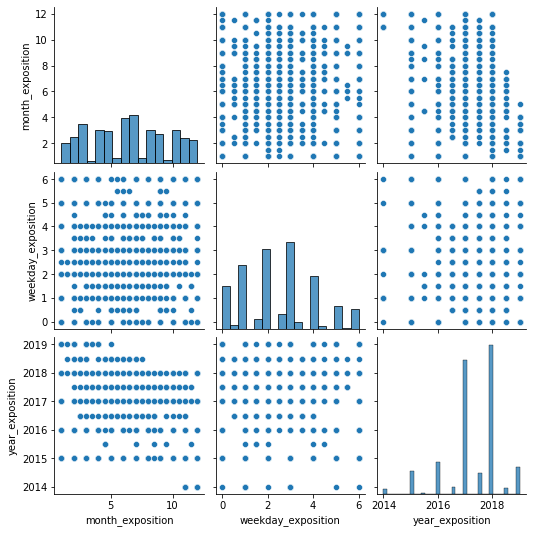

In [146]:
# Построим графики зависимости цены от даты размещения (день недели, месяц, год)
sns.pairplot(price_and_pivot_table)

In [147]:
# Найдем 10 населенных пунктов с наибольшим числом объявлений
top_localities = data['locality_name'].value_counts().head(10)
top_localities

Санкт-Петербург      15397
поселок Мурино         590
деревня Кудрово        472
поселок Шушары         440
Всеволожск             398
Пушкин                 367
Колпино                337
поселок Парголово      327
Гатчина                307
Выборг                 237
Name: locality_name, dtype: int64

In [148]:
# Создадим таблицу с информацией о средней цене за м2 для 10 населенных пунктов с наибольшим числом объявлений
top_localities_meter_price = data.query('locality_name in @top_localities.index').pivot_table(index='locality_name', values='one_square_meter_price')
# Выведем среднюю цену за м2 по убыванию для 10 населенных пунктов с наибольшим числом объявлений
top_localities_meter_price.sort_values('one_square_meter_price', ascending=False).round(1)

one_square_meter_price
locality_name                            
Санкт-Петербург                  110507.8
Пушкин                           103130.9
деревня Кудрово                   95324.9
поселок Парголово                 90175.9
поселок Мурино                    86087.5
поселок Шушары                    78677.4
Колпино                           75333.3
Гатчина                           68746.1
Всеволожск                        68654.5
Выборг                            58141.9

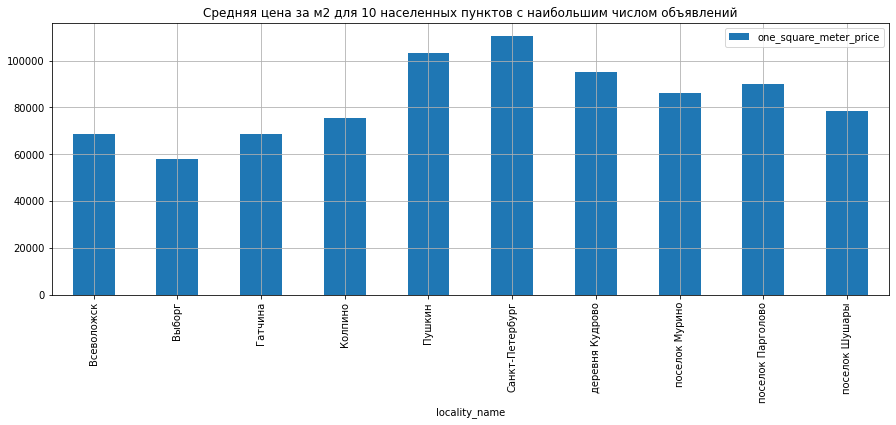

In [149]:
# Построим график с информацией о средней цене за м2 для 10 населенных пунктов с наибольшим числом объявлений
top_localities_meter_price.plot(
    kind='bar',
    y='one_square_meter_price',
    title='Средняя цена за м2 для 10 населенных пунктов с наибольшим числом объявлений', 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.show()

***На основе полученных данных можно отметить, что:***

На графике мы видим, что самая дорогая стоимость м2 (110 570,8 р.) - в Санкт-Петербурге, что весьма логично, ведь это северная столица России. На втором месте - Пушкин (103130.9 р./м2). В Пушкине расположено Царское Село, дворцы и другие достопримечательности, поэтому, думаю, высокая стоимость связана с этим фактом. На третьем месте - Кудрово (95324.9 р./м2). Думаю, это связано с тем, что Кудрово находится на границе с Санкт-Петербургом и в пределах КАД.

Самая низкая стоимость за м2 у квартир в Выборге (58141.9 р./м2), Всеволжске (68654.5 р./м2) и Гатчине (68746.1 р./м2). Возможно, это связано с отдаленностью от Санкт-Петербурга.

In [150]:
# Выделим квартиры, находящиеся только в Санкт-Петербурге
data['last_price'].astype(int)
spb = data.query('locality_name == "Санкт-Петербург"')
spb.head(5)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
7             5   7915000.0        71.6           2019-04-18      2   
9            18   5400000.0        61.0           2017-02-26      3   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16         51.0      8         False   False   
2            2.65             5         34.3      4         False   False   
4            3.03            14         32.0     13         False   False   
7            2.65            24          NaN     22         False   False   
9            2.50             9         43.6      7         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0        0  Санкт-Петербург           18863.0   
2      False           8.3        0  Санкт-Петербург           21741.0   
4      False          41.0        0  Санкт-Петербург           31856.0   
7      False          18.9        2  Санкт-Петербург           23982.0   
9      False           6.5        2  Санкт-Петербург           50898.0   

   city_centers_nearest  parks_around_3000  parks_nearest  ponds_around_3000  \
0               16028.0                  1          482.0                  2   
2               13933.0                  1           90.0                  2   
4                8098.0                  2          112.0                  1   
7               11634.0                  0            NaN                  0   
9               15008.0                  0            NaN                  0   

   ponds_nearest  days_exposition  one_square_meter_price  weekday_exposition  \
0          755.0              NaN                120370.4                   3   
2          574.0            558.0                 92785.7                   3   
4           48.0            121.0                100000.0                   1   
7            0.0              NaN                110544.7                   3   
9            0.0            289.0                 88524.6                   6   

   month_exposition  year_exposition type_of_floor  \
0                 3             2019        другой   
2                 8             2015        другой   
4                 6             2018        другой   
7                 4             2019        другой   
9                 2             2017        другой   

   city_centers_nearest_kilometers  
0                             16.0  
2                             14.0  
4                              8.0  
7                             12.0  
9                             15.0

In [151]:
# Создадим таблицу с информацией о средней общей цене квартир на каждый километр отдаления от центра в Санкт-Петербурге
city_centers_nearest_kilometers_price = spb.pivot_table(index='city_centers_nearest_kilometers', values='last_price').astype(int)
city_centers_nearest_kilometers_price

last_price
city_centers_nearest_kilometers            
0.0                                11318666
1.0                                11830076
2.0                                11128243
3.0                                 9772281
4.0                                10334120
5.0                                10895075
6.0                                 9755563
7.0                                 9278995
8.0                                 8785690
9.0                                 6764538
10.0                                6424632
11.0                                6094948
12.0                                5810358
13.0                                6083140
14.0                                5586742
15.0                                5828811
16.0                                5352064
17.0                                5241740
18.0                                5091331
19.0                                5037674
20.0                                5951464
21.0                                5493469
22.0                                5415524
23.0                                4985376
24.0                                3854429
25.0                                4052839
26.0                                3973012
27.0                                8300000
28.0                                5026428
29.0                                4236666

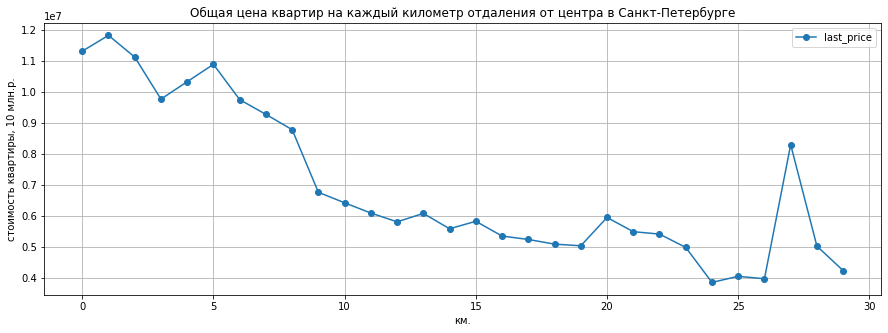

In [152]:
# Построим график с информацией о средней общей цене квартир на каждый километр отдаления от центра в Санкт-Петербурге
city_centers_nearest_kilometers_price.plot(
    y='last_price', 
    style='o-',
    title='Общая цена квартир на каждый километр отдаления от центра в Санкт-Петербурге', 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.xlabel('км.')
plt.ylabel('стоимость квартиры, 10 млн.р.')
plt.show()

In [153]:
# Создадим таблицу с информацией о средней цене м2 на каждый километр отдаления от центра в Санкт-Петербурге
city_centers_nearest_kilometers_price_2 = spb.pivot_table(index='city_centers_nearest_kilometers', values='one_square_meter_price').astype(int)
city_centers_nearest_kilometers_price_2

one_square_meter_price
city_centers_nearest_kilometers                        
0.0                                              120645
1.0                                              143813
2.0                                              127486
3.0                                              116462
4.0                                              124652
5.0                                              131201
6.0                                              130539
7.0                                              131238
8.0                                              124171
9.0                                              112431
10.0                                             112578
11.0                                             108044
12.0                                             107476
13.0                                             108148
14.0                                             104255
15.0                                             104128
16.0                                             100480
17.0                                              96564
18.0                                              96362
19.0                                              98652
20.0                                             103045
21.0                                              94469
22.0                                              91330
23.0                                              91828
24.0                                              85736
25.0                                              91531
26.0                                              89285
27.0                                             132115
28.0                                              81161
29.0                                              72953

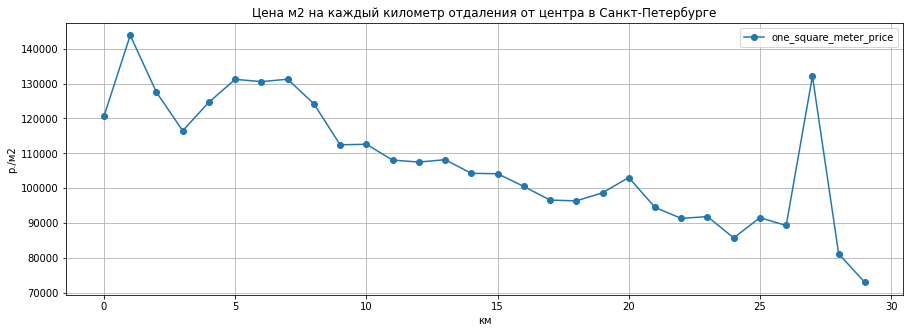

In [154]:
# Построим график с информацией о средней цене м2 на каждый километр отдаления от центра в Санкт-Петербурге
city_centers_nearest_kilometers_price_2.plot(
    y='one_square_meter_price', 
    style='o-',
    title='Цена м2 на каждый километр отдаления от центра в Санкт-Петербурге', 
    figsize=(15, 5), 
    grid=True, 
    legend=True
)
plt.xlabel('км')
plt.ylabel('р./м2')
plt.show()

***На основе полученных данных можно отметить, что:***

На обоих графиках мы видим, что самая дорогая недвижимость - в центре, на расстоянии до 5 км. При этом самый пик - центр до 1 км. Это логично, ведь жить в центре города всегда дорого. Начиная с 5 км от центра недвижимость начинает практически всегда падать в цене. Однако на графиках есть небольшие пики - на 20 км и особенно на 27 км в отдалении от центра. Возможно, пики связаны с тем, что в районах на этом удалении были построены новые жилые комплексы хорошего качества (не эконом-класс) от дорогих застройщиков. В целом, зависимость стоимости жилья от центра города и удаленности от центра наблюдается.

***Вывод***

1.Изучены различные параметры объектов, построены гистограммы по ним.

2.Получена информация о том, как быстро продавались квартиры, построены гистограммы.

3.Изучены различные факторы, которые могут повлиять на общую стоимость квартиры. Так же построены графики.

4.Найдена средняя цена м2 в 10 населённых пунктах с наибольшим числом объявлений, получена информация о городах с самой высокой и низкой стоимостью м2.

5.Получена информация о средней цене м2 на каждый километр отдаления от центра в Санкт-Петербурге и об общей цене квартир на каждый километр отдаления от центра в Санкт-Петербурге.

### Общий вывод

Была проделана работа по ознакомлению с данными, обработке пропусков, замене типов данных, обработке явных и неявных дубликатов и аномалий. При этом я старалась сохранить как можно больше данных в таблице, не избавляясь от строк с пропусками и аномалиями просто так. Также в таблицу были добавлены новые столбцы на основе имеющейся информации.

В ходе исследования мы выяснили, что на общую стоимость квартиры оказывают влияние следующие параметры: 

-общая площадь (в том числе жилой зоны и кухни). Чем больше площадь, тем выше цена квартиры; 

-количество комнат. Чем больше комнат, тем выше стоимость;

-этаж. Квартиры, которые располагаются не на 1 и не на последнем этажах выше по стоимости;

-расстояние от центра города. Чем квартира ближе к центру, тем она дороже.

Также стало понятно, что самые популярные дни для размещения объявлений - со вторника по пятницу. Что касается месяцев, чаще всего размещают объявления с февраля по апрель включительно. Это отличное время после январских праздников и до майских выходных и лета. Второй по популярности период - это осень, как раз после летнего периода.

Самый большой спрос - на 1-комнатные и 2-комнатные квартиры со стандартными потолками 2,65 м.

Средним показателем продажи квартиры является период в 40-220 дней. Быстрая продажа - период до 40 дней. 

Также мы подтвердили для себя, что квартиры в Санкт-Петербурге и Пушкине стоят дороже, чем в других близлежащих городах. Самая высокая средняя стоимость м2 в Петербурге составляет 110 507.8 р.

Исходя из анализа различных гистограмм, мы пришли к выводу, что самый популярный вариант недвижимости это: Квартира площадью 45 м2, с жилой зоной в 18 м2 и кухней в 5,5-6 м2, стоимостью 3,5-3,8 млн. р., однокомнатная, со стандартным потолком 2,65 м., расположенная на 2 этаже в пятиэтажном доме, в 13 км. от центра города и/или в 15 км. от аэропорта, в 430 м. от парка. 